<a href="https://colab.research.google.com/github/PreposterousTurtle/LearningPythonAI-ML/blob/main/Following_MAGIC_exampleyt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R. Bock. "MAGIC Gamma Telescope," UCI Machine Learning Repository, 2004. [Online]. Available: https://doi.org/10.24432/C52C8B.

Notes
Supervised learning - labels are on the data given to the model
One-hot encoding - put a one for the selected and 0 for others
K Nearest Neighbors -



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
#load in the data with the column titles

cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#turn the class into 1 or 0 (gamma or hadron) This isthe classification we will predict

df["class"] = (df["class"] == "g").astype(int)


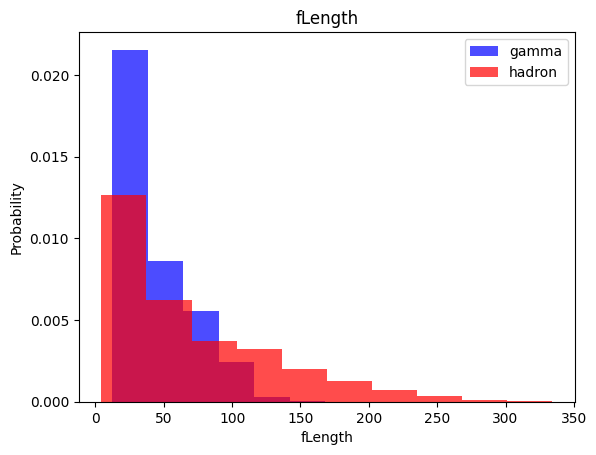

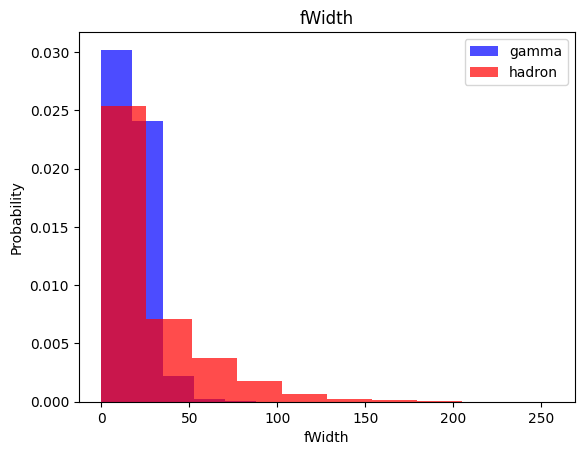

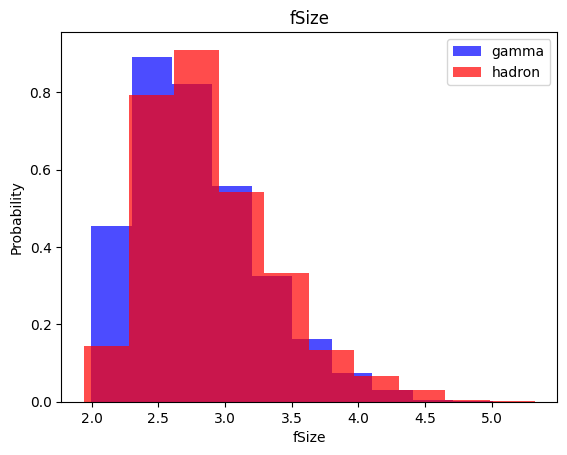

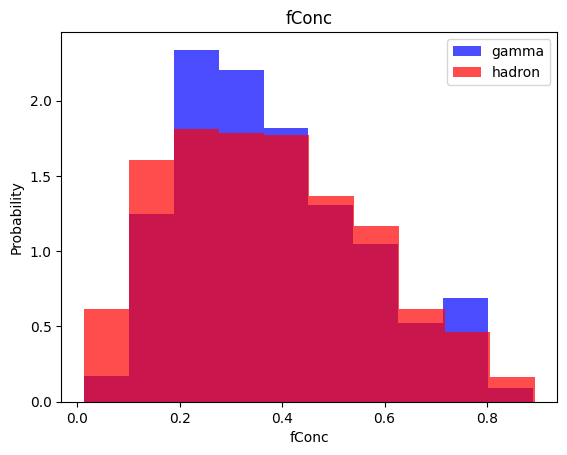

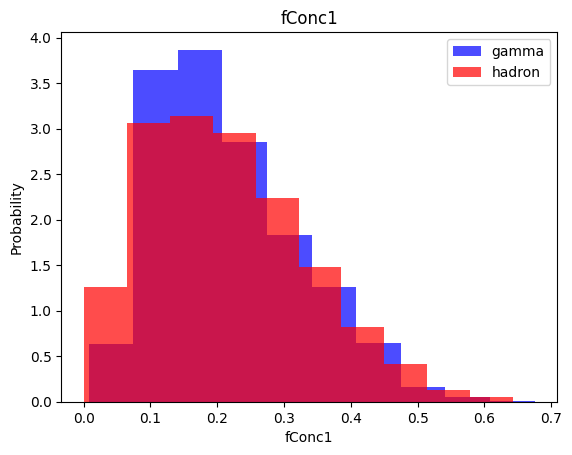

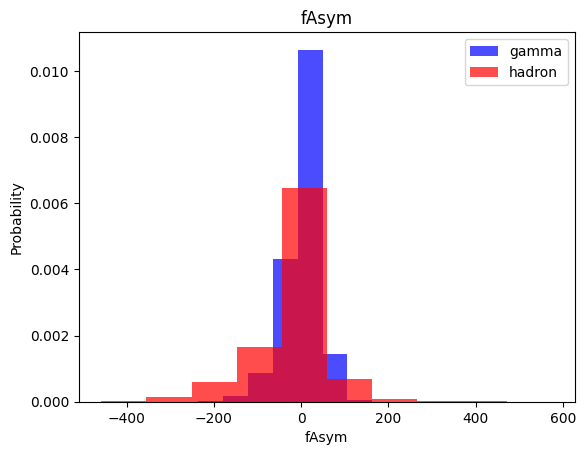

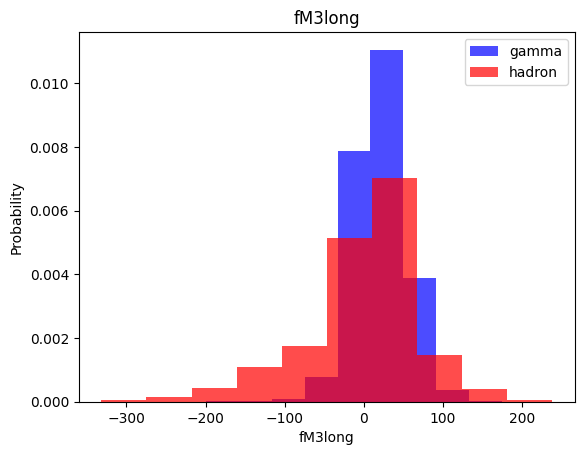

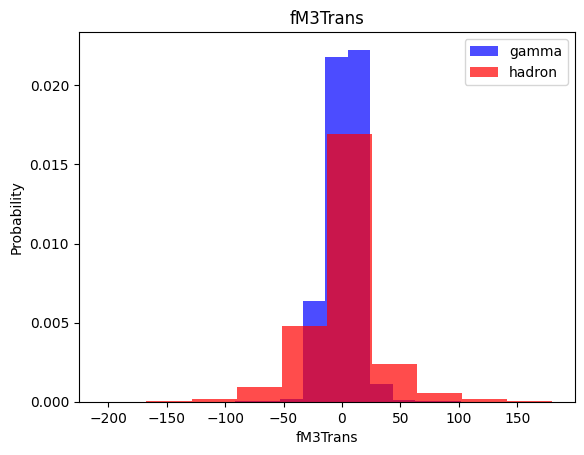

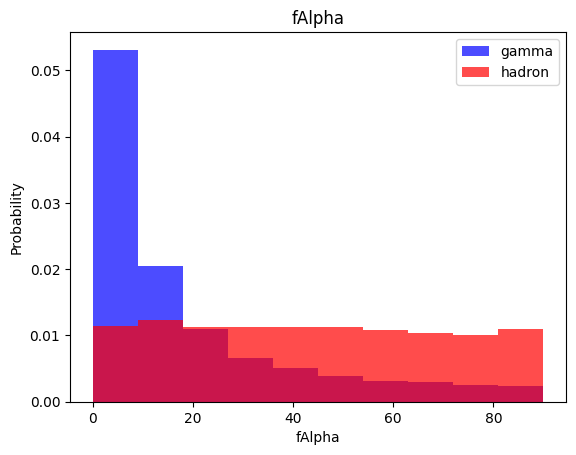

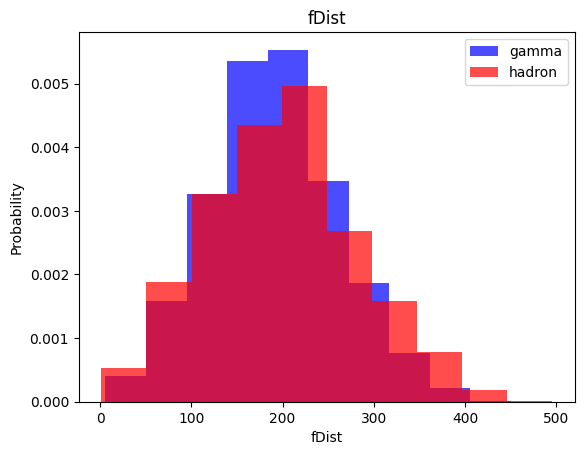

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label = 'gamma', alpha= 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color='red', label = 'hadron', alpha= 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [ ]:
# Train Validate Test
# Divide the dataset so there is some data to train and some to test the model

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  #Match the size of the data
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y, (-1,1))))
  return data, x, y


In [ ]:
print(len(train[train["class"]==1])) # number of gamma
print(len(train[train["class"]==0])) # number of hadron

7366
4046


In [ ]:
train, x_train, ytrain = scale_dataset(train, oversample = True)
valid, x_valid, yvalid = scale_dataset(valid, oversample = False)
test, x_test, ytest = scale_dataset(test, oversample = False)

#K-Nearest-Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, ytrain)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred = knn_model.predict(x_test)


In [ ]:
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1334
           1       0.85      0.85      0.85      2470

    accuracy                           0.80      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.80      0.80      0.80      3804



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, ytrain)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1334
           1       0.73      0.89      0.80      2470

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



#logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, ytrain)

In [ ]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1334
           1       0.73      0.89      0.80      2470

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



# Support Vector Machines


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, ytrain)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1334
           1       0.89      0.90      0.90      2470

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Network


In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
history = nn_model.fit(x_train, ytrain, epochs=100, batch_size=32, validation_split=0.2)
#Accuracy goes up loss goes down

Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8832 - loss: 0.2644 - val_accuracy: 0.7862 - val_loss: 0.4256
Epoch 2/100
150/369 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8902 - loss: 0.2651

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
def train_model(x_train, ytrain, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([

      tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),

      #gives a 1 or 0 - useful for classifying
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                   loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(x_train, ytrain, epochs=epochs, batch_size=batch_size,
                         validation_split=0.2, verbose =0 )

  return nn_model, history

16 nodes, dropout 0, lr0.01, batch size 32


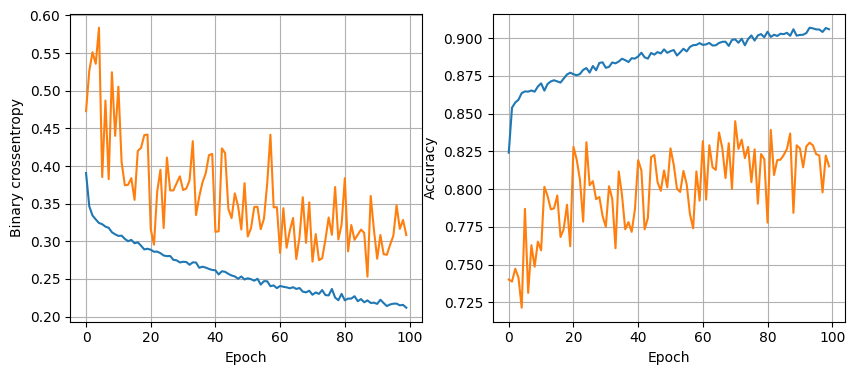

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.4209
Validation loss: 0.4095868170261383
16 nodes, dropout 0, lr0.01, batch size 64


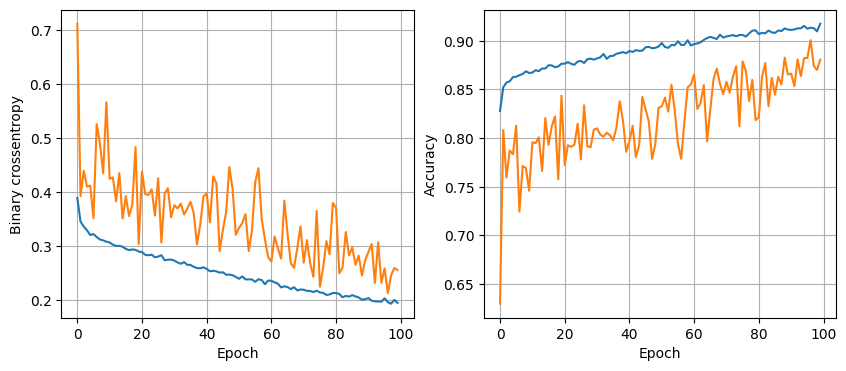

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.5082
Validation loss: 0.49843141436576843
16 nodes, dropout 0, lr0.01, batch size 128


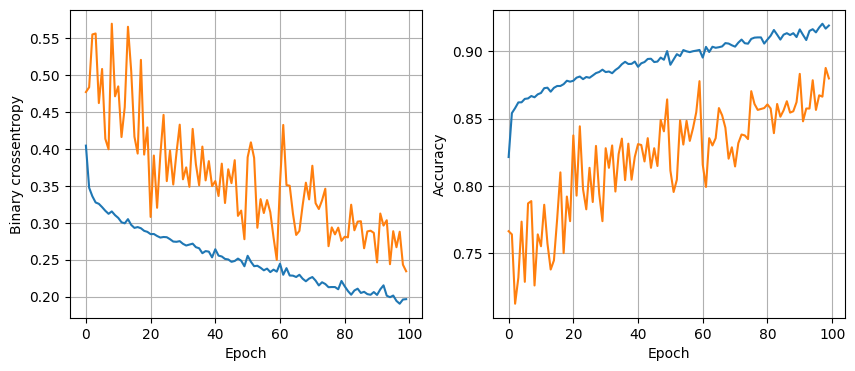

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.4420
Validation loss: 0.4290466010570526
16 nodes, dropout 0, lr0.005, batch size 32


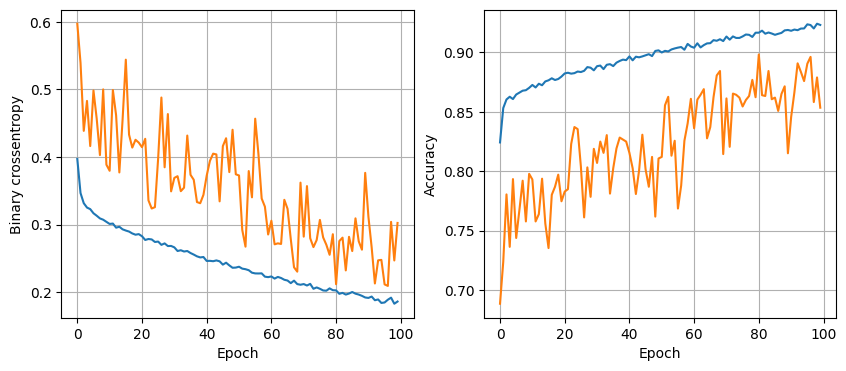

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.4805
Validation loss: 0.460313081741333
16 nodes, dropout 0, lr0.005, batch size 64


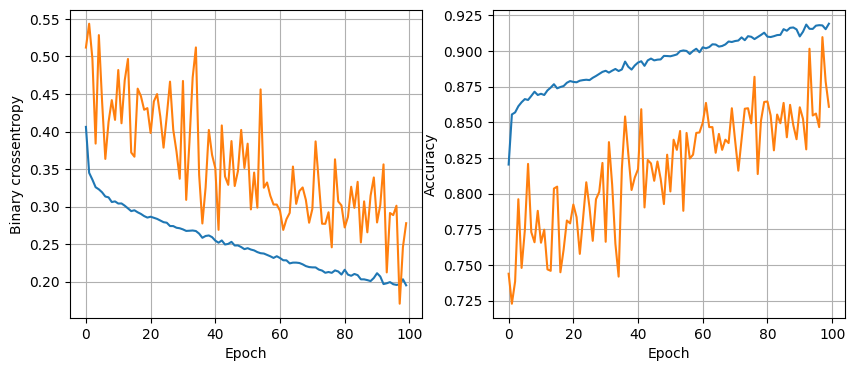

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.4093
Validation loss: 0.3878938853740692
16 nodes, dropout 0, lr0.005, batch size 128


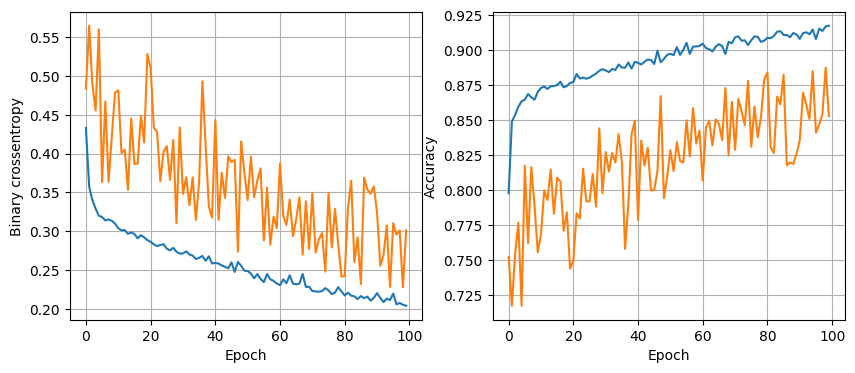

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8685 - loss: 0.3629
Validation loss: 0.3598802387714386
16 nodes, dropout 0, lr0.001, batch size 32


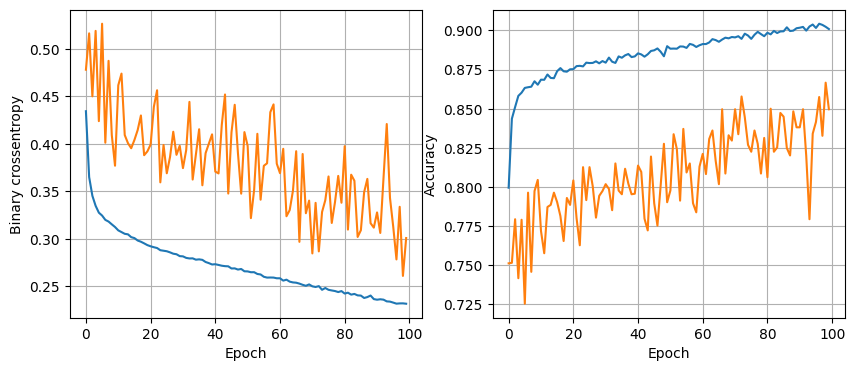

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8703 - loss: 0.3426
Validation loss: 0.3372832238674164
16 nodes, dropout 0, lr0.001, batch size 64


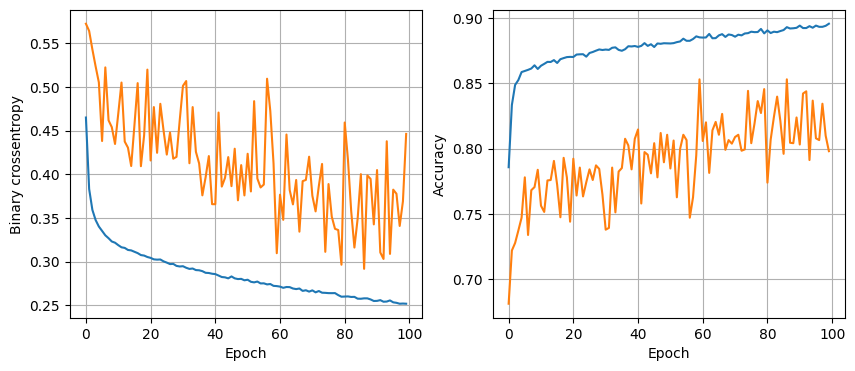

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3316
Validation loss: 0.32426318526268005
16 nodes, dropout 0, lr0.001, batch size 128


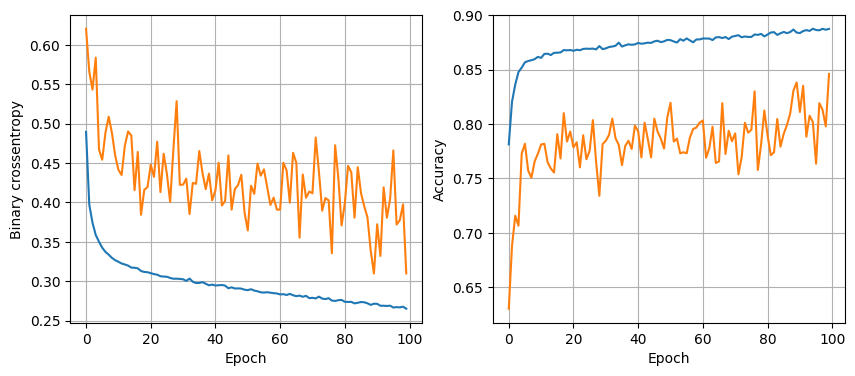

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3235
Validation loss: 0.31966403126716614
16 nodes, dropout 0.2, lr0.01, batch size 32


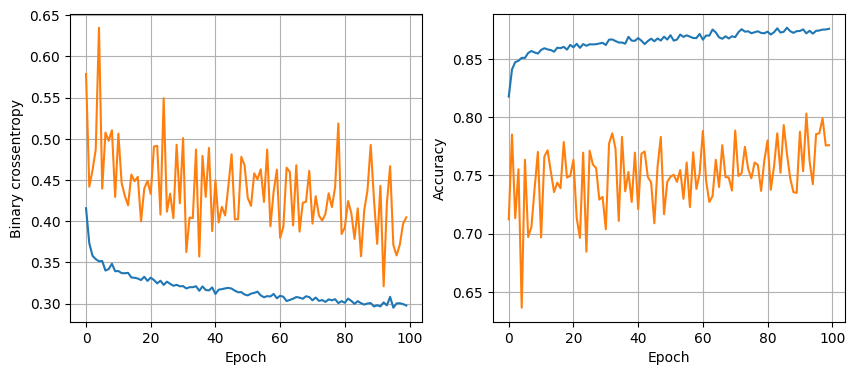

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8721 - loss: 0.3117
Validation loss: 0.308104544878006
16 nodes, dropout 0.2, lr0.01, batch size 64


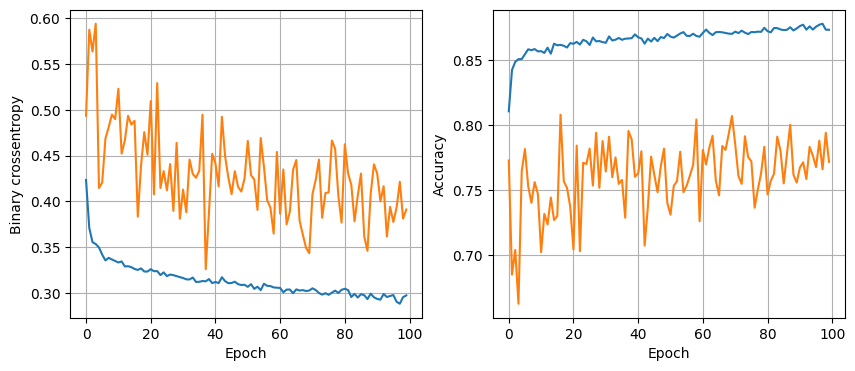

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3147
Validation loss: 0.3091713488101959
16 nodes, dropout 0.2, lr0.01, batch size 128


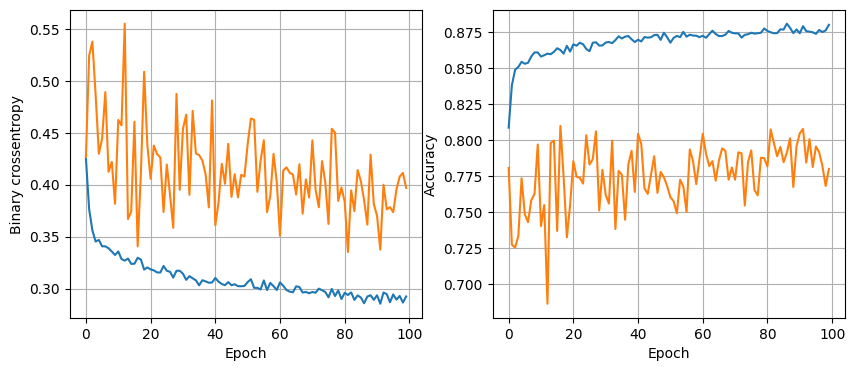

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.3124
Validation loss: 0.3054114580154419
16 nodes, dropout 0.2, lr0.005, batch size 32


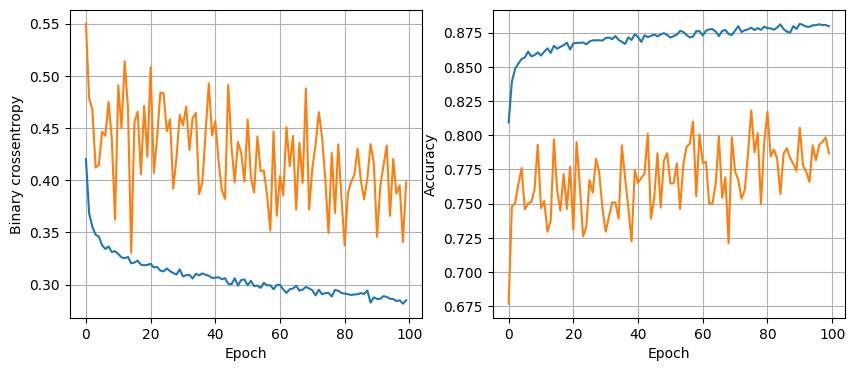

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8721 - loss: 0.3209
Validation loss: 0.31172898411750793
16 nodes, dropout 0.2, lr0.005, batch size 64


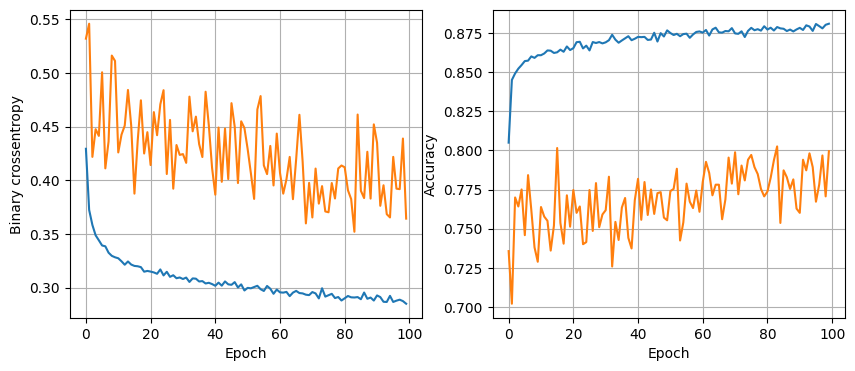

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8766 - loss: 0.3090
Validation loss: 0.3034082353115082
16 nodes, dropout 0.2, lr0.005, batch size 128


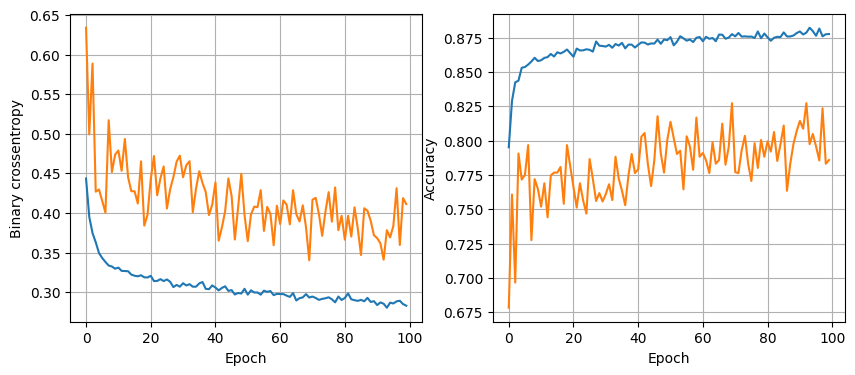

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.3102
Validation loss: 0.30788370966911316
16 nodes, dropout 0.2, lr0.001, batch size 32


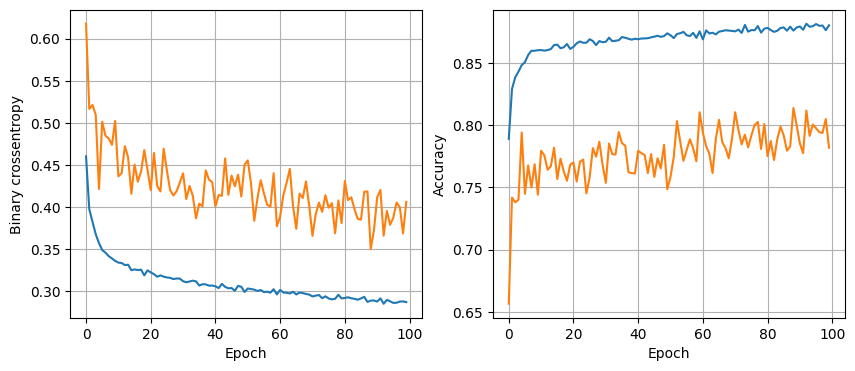

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.3097
Validation loss: 0.30288371443748474
16 nodes, dropout 0.2, lr0.001, batch size 64


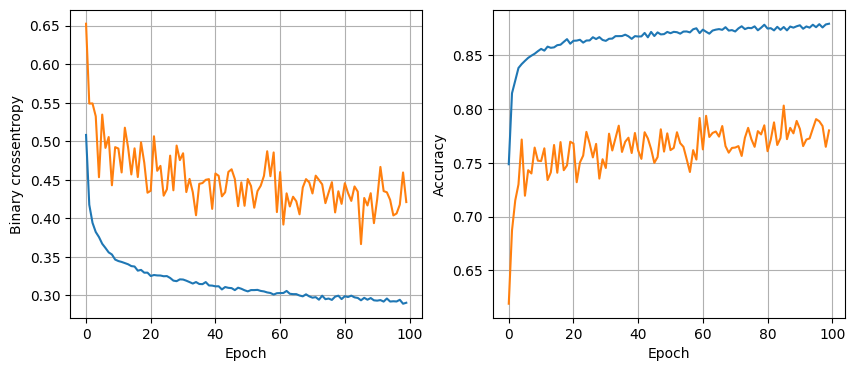

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.3032
Validation loss: 0.29796597361564636
16 nodes, dropout 0.2, lr0.001, batch size 128


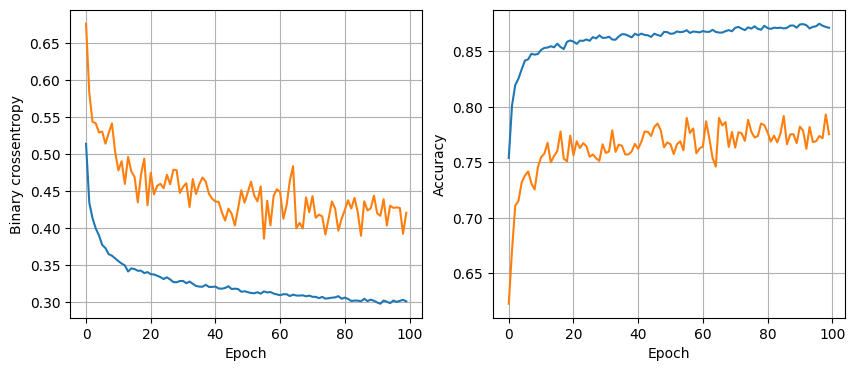

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3066
Validation loss: 0.30193912982940674
32 nodes, dropout 0, lr0.01, batch size 32


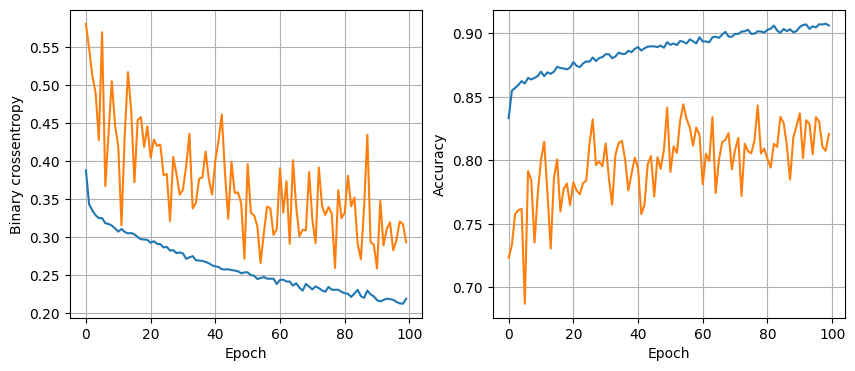

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.4256
Validation loss: 0.42543891072273254
32 nodes, dropout 0, lr0.01, batch size 64


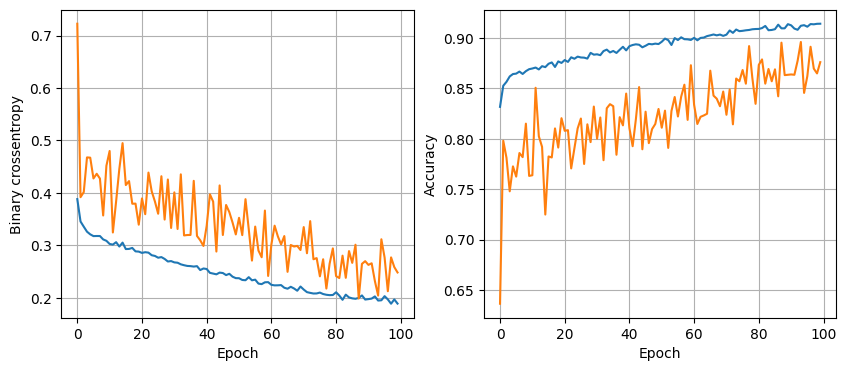

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.4632
Validation loss: 0.4424741268157959
32 nodes, dropout 0, lr0.01, batch size 128


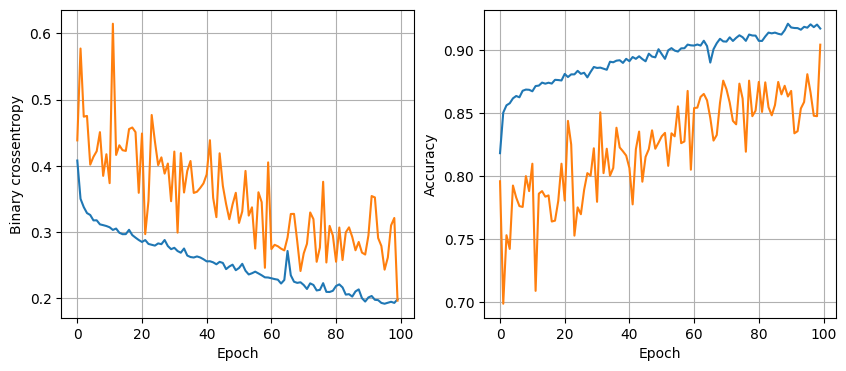

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8575 - loss: 0.4169
Validation loss: 0.41953590512275696
32 nodes, dropout 0, lr0.005, batch size 32


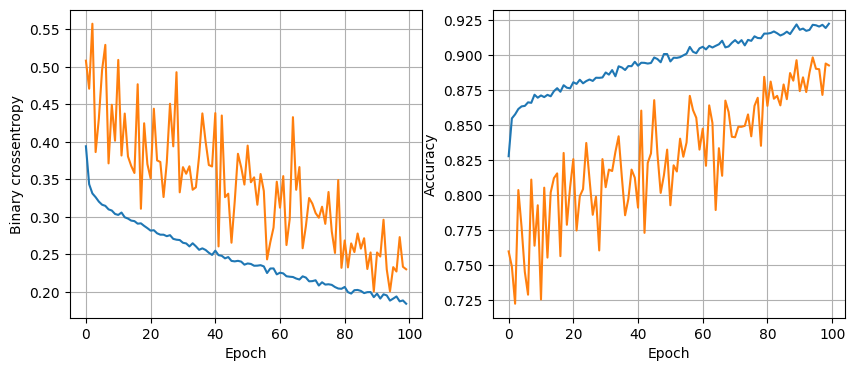

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8538 - loss: 0.4771
Validation loss: 0.4765680432319641
32 nodes, dropout 0, lr0.005, batch size 64


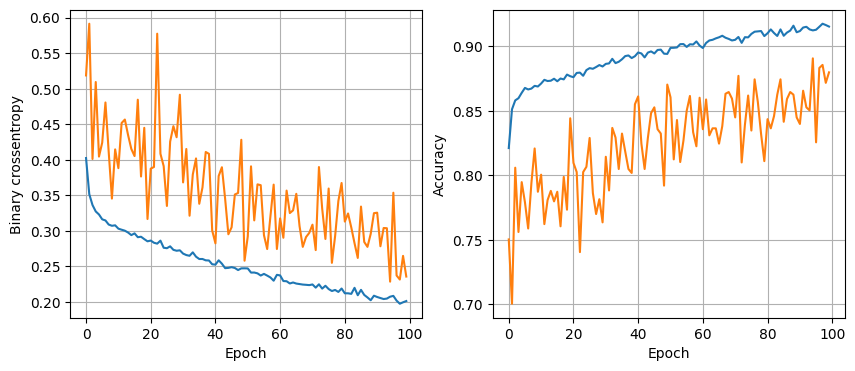

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.4576
Validation loss: 0.43607500195503235
32 nodes, dropout 0, lr0.005, batch size 128


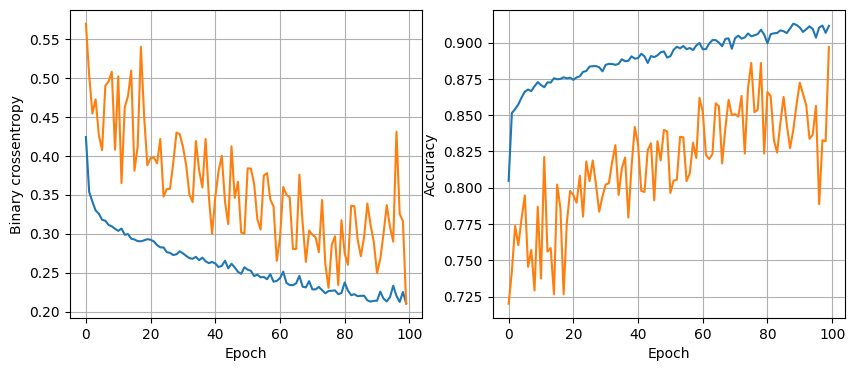

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8627 - loss: 0.4082
Validation loss: 0.3952067792415619
32 nodes, dropout 0, lr0.001, batch size 32


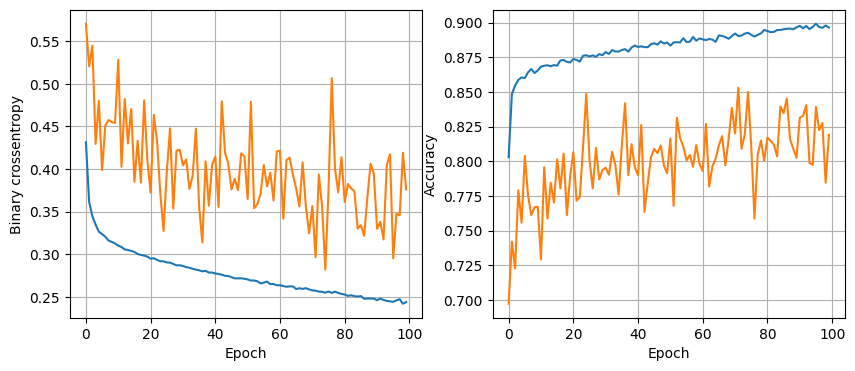

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8693 - loss: 0.3306
Validation loss: 0.323992520570755
32 nodes, dropout 0, lr0.001, batch size 64


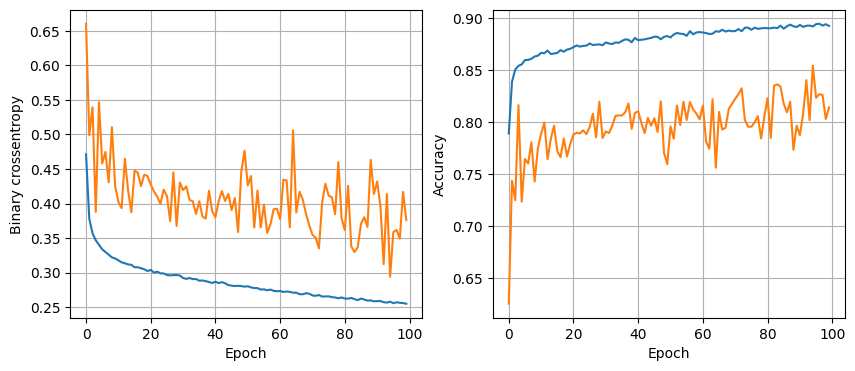

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8774 - loss: 0.3191
Validation loss: 0.31484857201576233
32 nodes, dropout 0, lr0.001, batch size 128


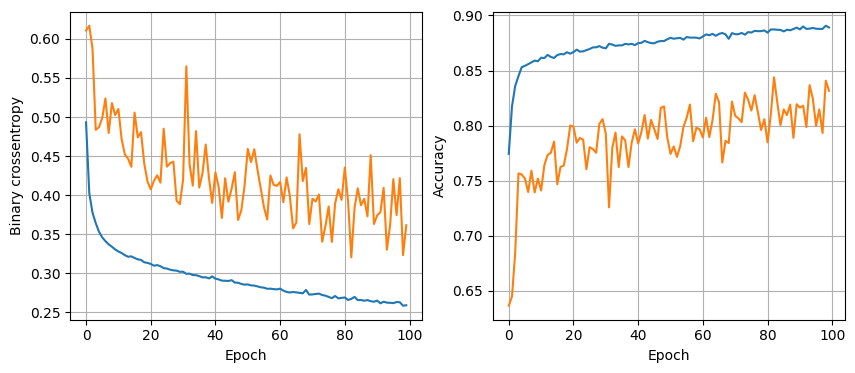

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3189
Validation loss: 0.31334027647972107
32 nodes, dropout 0.2, lr0.01, batch size 32


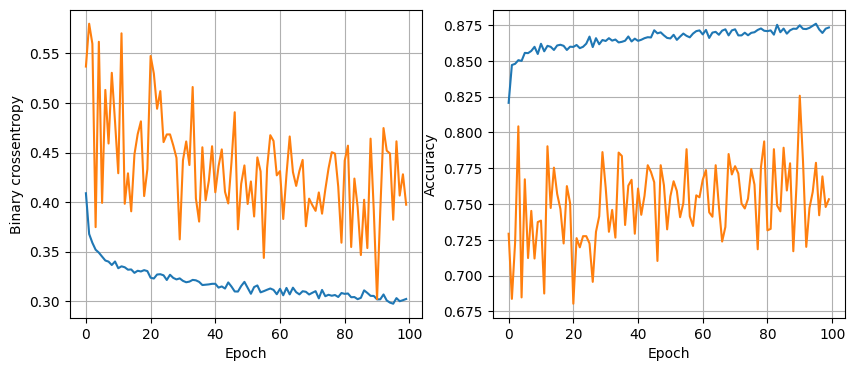

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8744 - loss: 0.3124
Validation loss: 0.3098444938659668
32 nodes, dropout 0.2, lr0.01, batch size 64


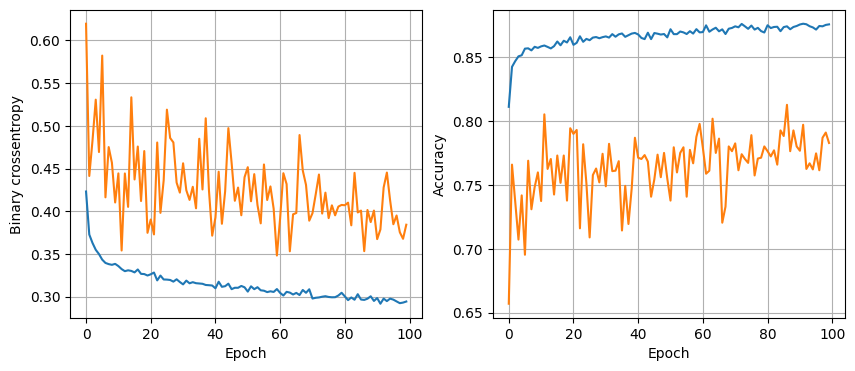

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.3280
Validation loss: 0.31787049770355225
32 nodes, dropout 0.2, lr0.01, batch size 128


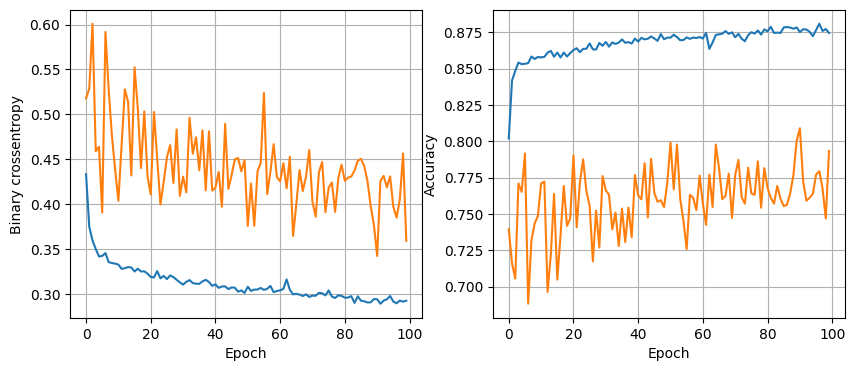

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.3117
Validation loss: 0.307738721370697
32 nodes, dropout 0.2, lr0.005, batch size 32


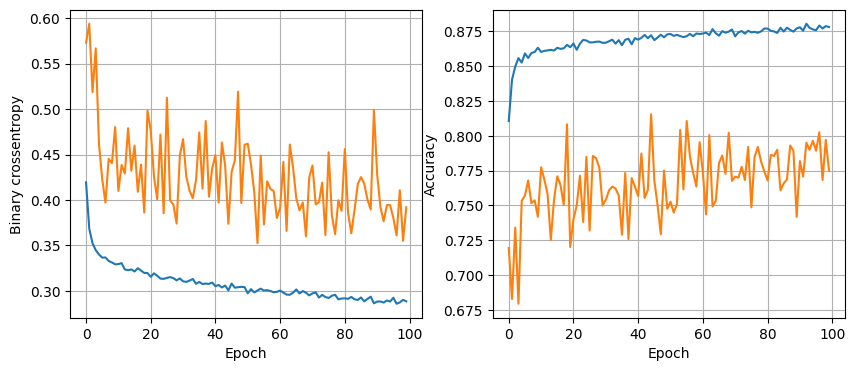

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8694 - loss: 0.3127
Validation loss: 0.30608317255973816
32 nodes, dropout 0.2, lr0.005, batch size 64


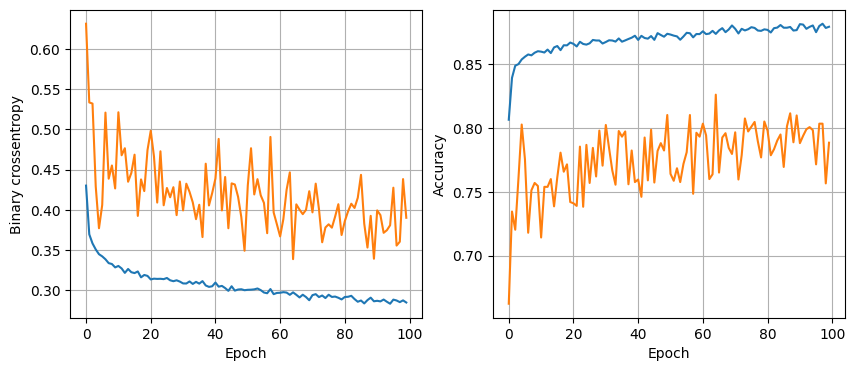

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8735 - loss: 0.3174
Validation loss: 0.30977386236190796
32 nodes, dropout 0.2, lr0.005, batch size 128


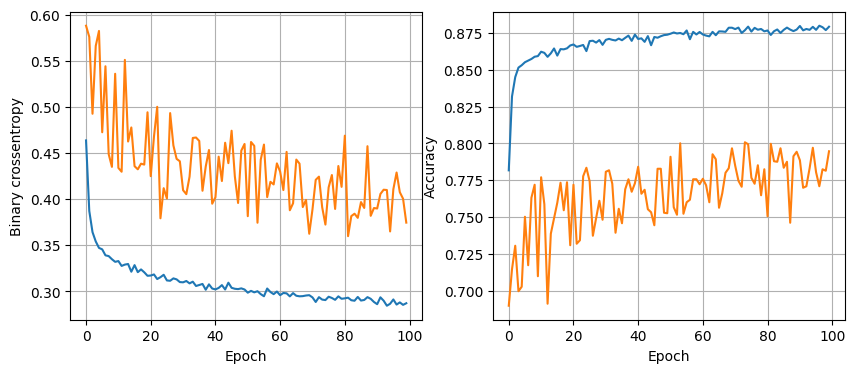

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8809 - loss: 0.3049
Validation loss: 0.302170991897583
32 nodes, dropout 0.2, lr0.001, batch size 32


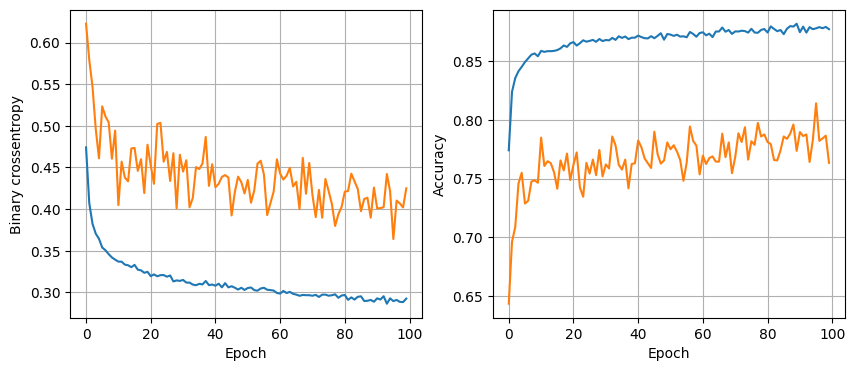

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.3013
Validation loss: 0.29926255345344543
32 nodes, dropout 0.2, lr0.001, batch size 64


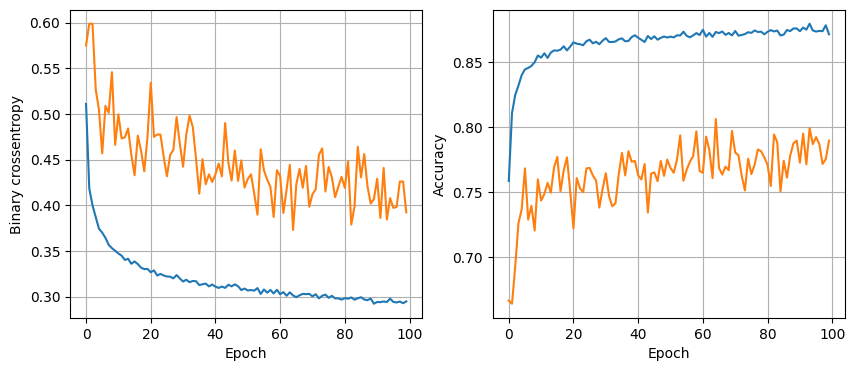

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3108
Validation loss: 0.30482348799705505
32 nodes, dropout 0.2, lr0.001, batch size 128


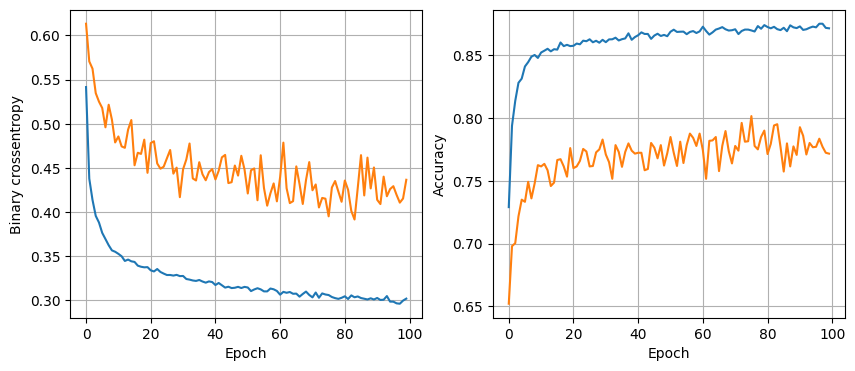

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8719 - loss: 0.3128
Validation loss: 0.3058047592639923
64 nodes, dropout 0, lr0.01, batch size 32


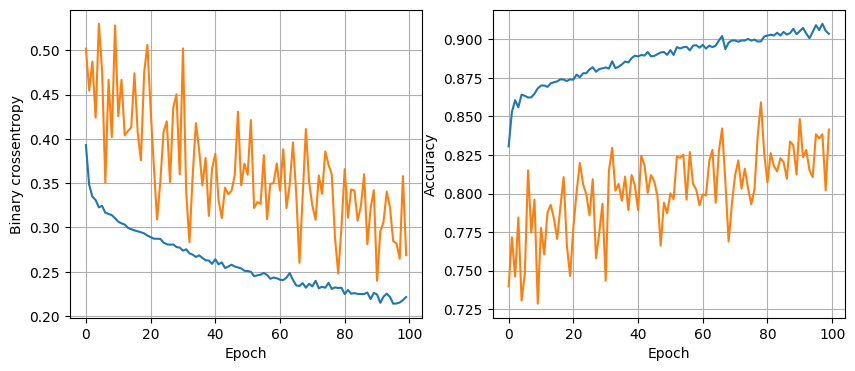

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8616 - loss: 0.4245
Validation loss: 0.4129783809185028
64 nodes, dropout 0, lr0.01, batch size 64


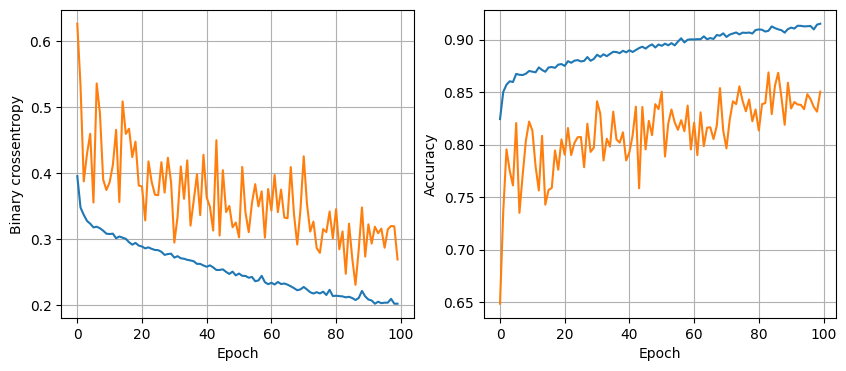

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.4306
Validation loss: 0.4311789274215698
64 nodes, dropout 0, lr0.01, batch size 128


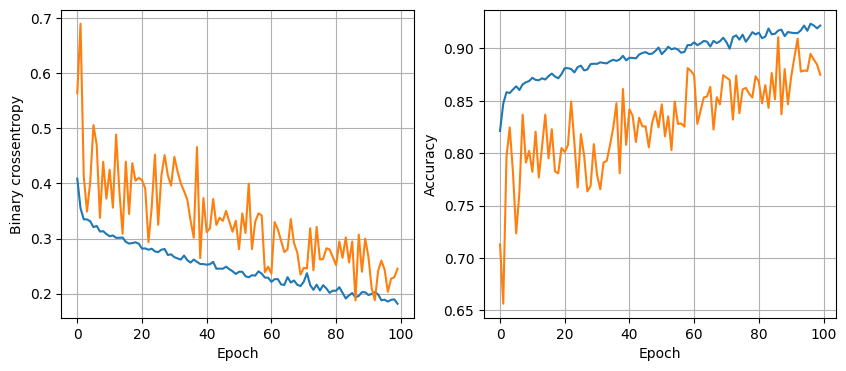

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8578 - loss: 0.4568
Validation loss: 0.43830767273902893
64 nodes, dropout 0, lr0.005, batch size 32


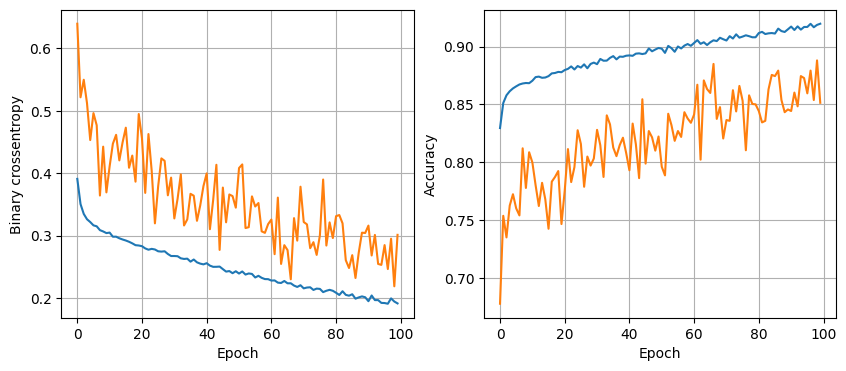

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.4655
Validation loss: 0.4553063213825226
64 nodes, dropout 0, lr0.005, batch size 64


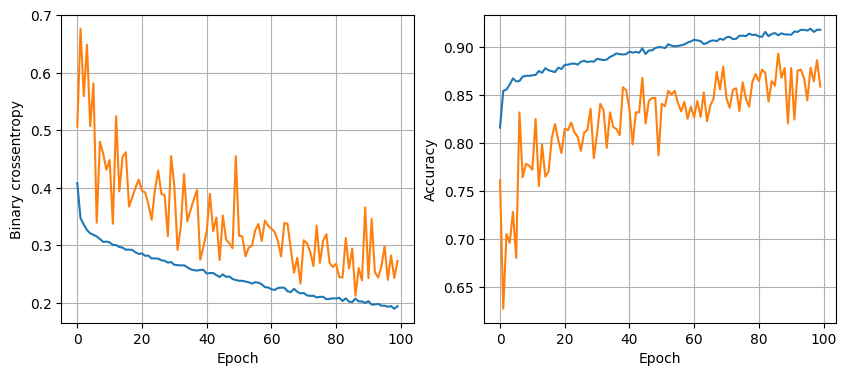

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.4627
Validation loss: 0.44062310457229614
64 nodes, dropout 0, lr0.005, batch size 128


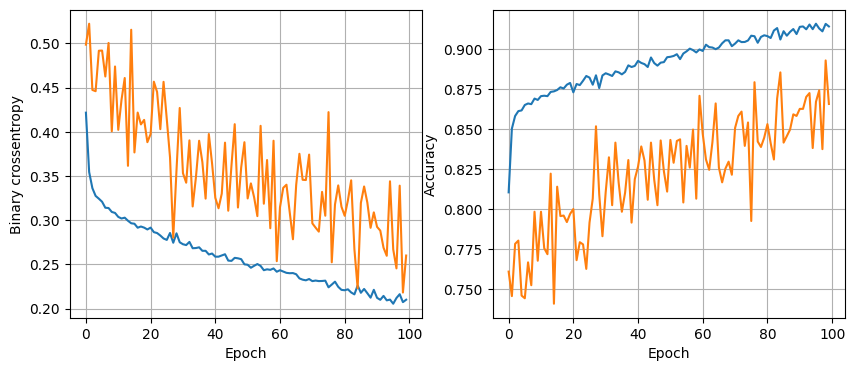

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.3835
Validation loss: 0.37916073203086853
64 nodes, dropout 0, lr0.001, batch size 32


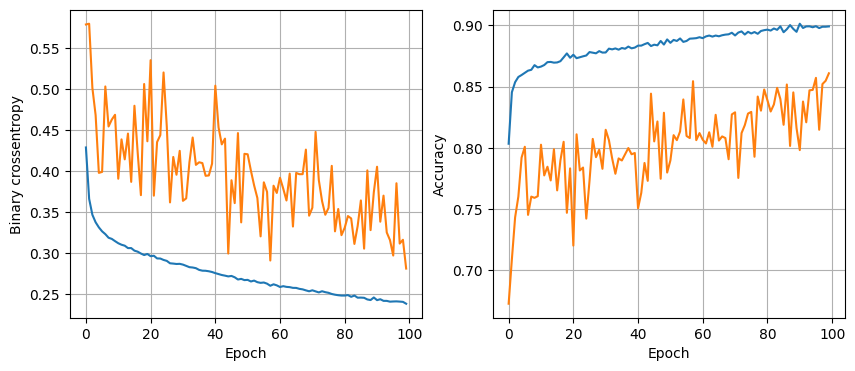

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3610
Validation loss: 0.35306981205940247
64 nodes, dropout 0, lr0.001, batch size 64


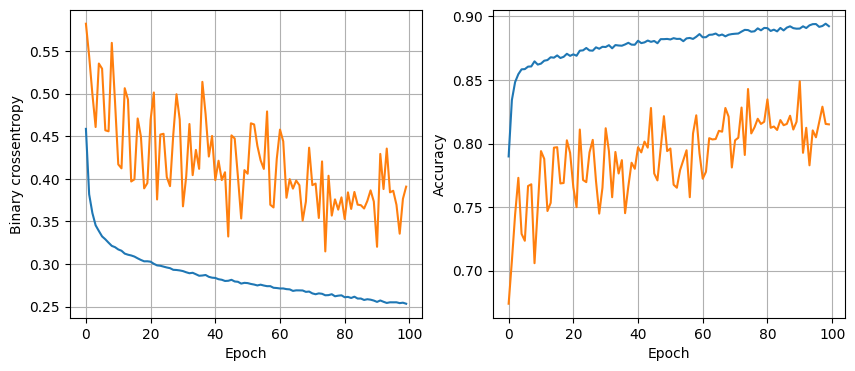

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8669 - loss: 0.3236
Validation loss: 0.3178327679634094
64 nodes, dropout 0, lr0.001, batch size 128


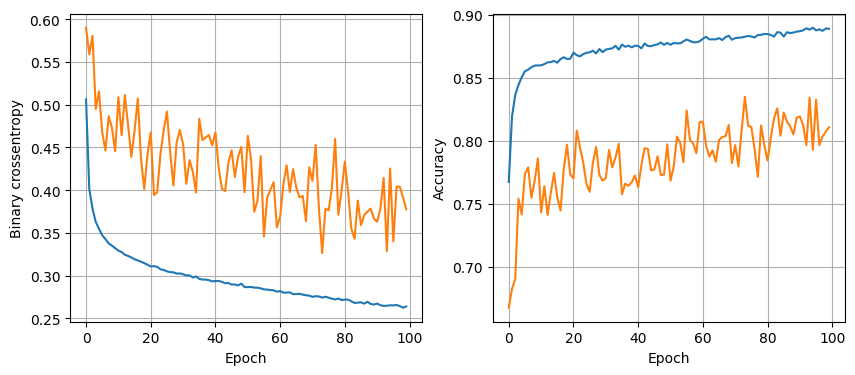

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.3114
Validation loss: 0.3078533709049225
64 nodes, dropout 0.2, lr0.01, batch size 32


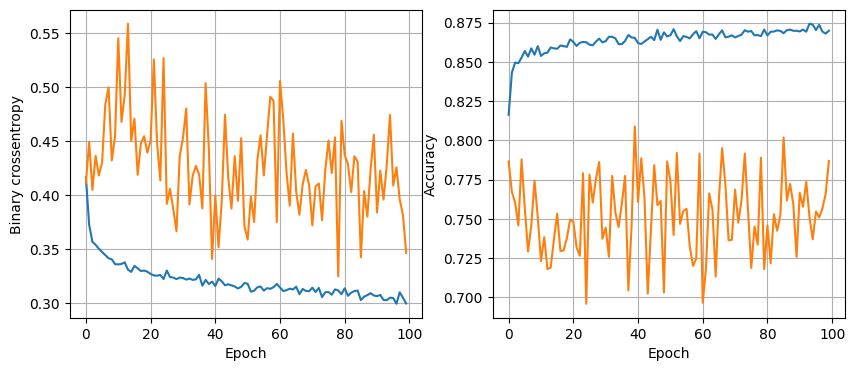

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8754 - loss: 0.3208
Validation loss: 0.31279072165489197
64 nodes, dropout 0.2, lr0.01, batch size 64


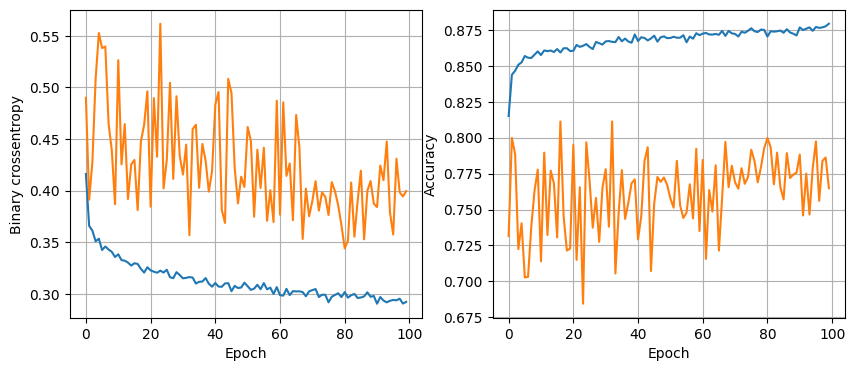

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8718 - loss: 0.3201
Validation loss: 0.31456097960472107
64 nodes, dropout 0.2, lr0.01, batch size 128


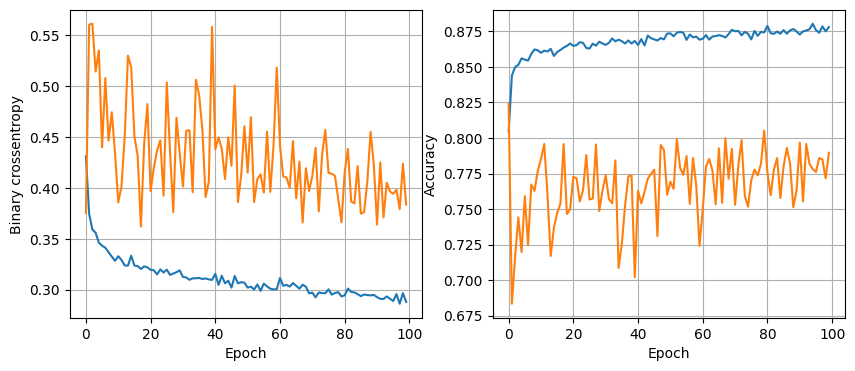

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3093
Validation loss: 0.30743327736854553
64 nodes, dropout 0.2, lr0.005, batch size 32


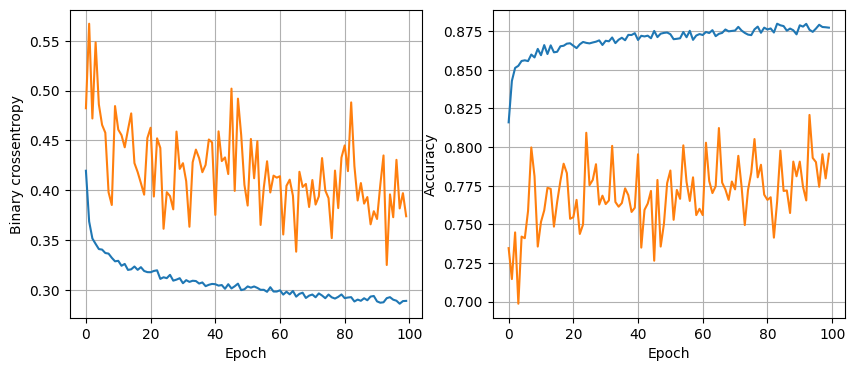

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8679 - loss: 0.3120
Validation loss: 0.3056192696094513
64 nodes, dropout 0.2, lr0.005, batch size 64


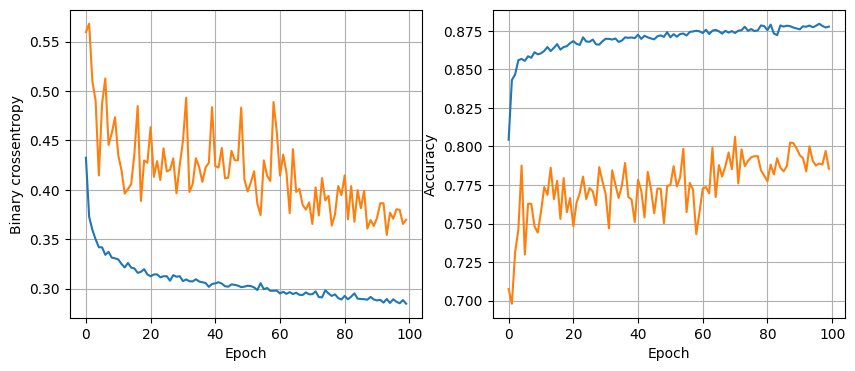

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.3070
Validation loss: 0.3030552566051483
64 nodes, dropout 0.2, lr0.005, batch size 128


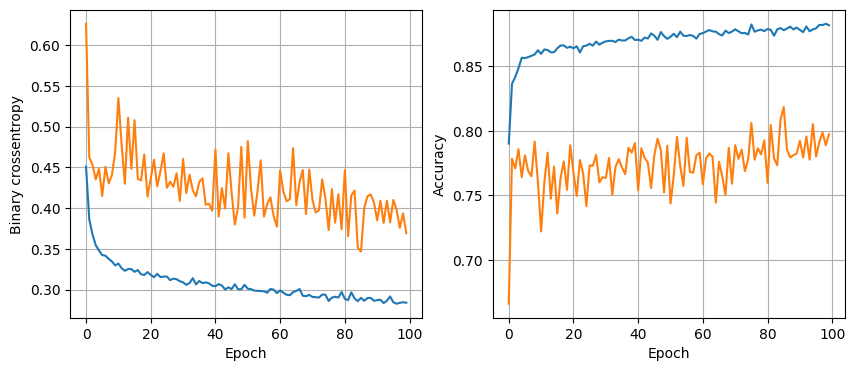

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8765 - loss: 0.3184
Validation loss: 0.306865394115448
64 nodes, dropout 0.2, lr0.001, batch size 32


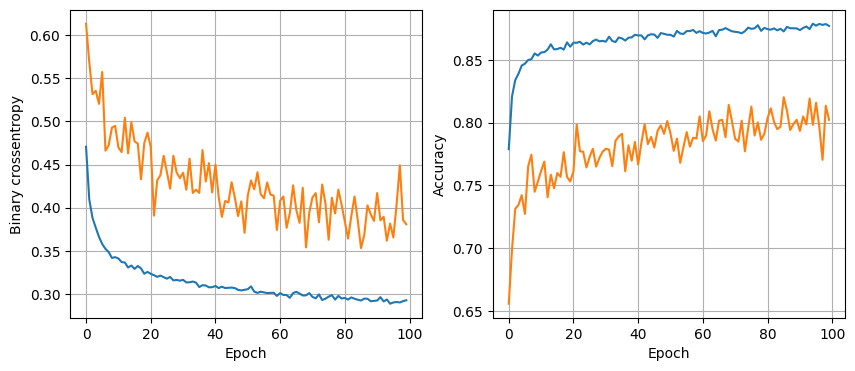

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - loss: 0.3164
Validation loss: 0.30731573700904846
64 nodes, dropout 0.2, lr0.001, batch size 64


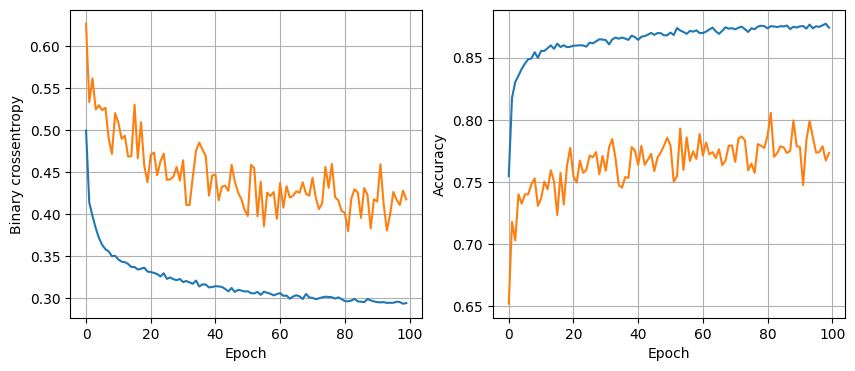

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.3059
Validation loss: 0.30131077766418457
64 nodes, dropout 0.2, lr0.001, batch size 128


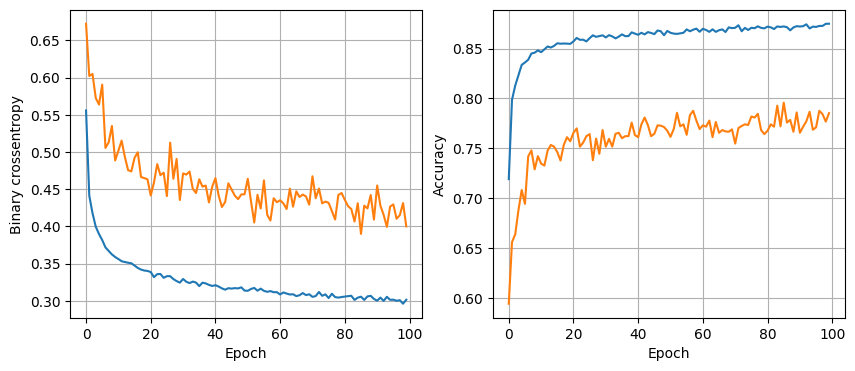

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8720 - loss: 0.3088
Validation loss: 0.30220457911491394
128 nodes, dropout 0, lr0.01, batch size 32


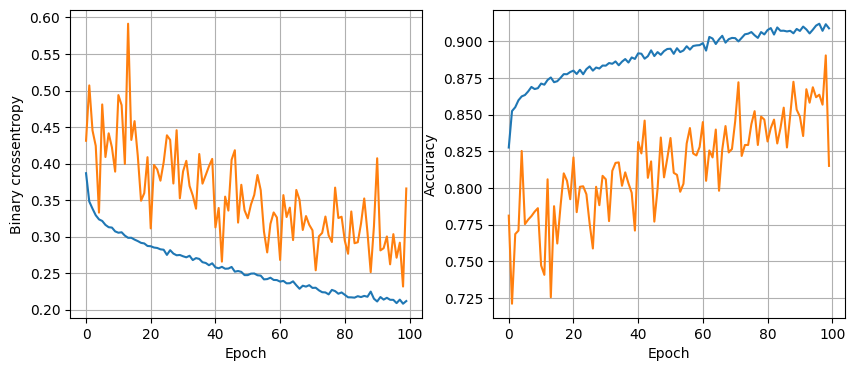

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8738 - loss: 0.4696
Validation loss: 0.44630688428878784
128 nodes, dropout 0, lr0.01, batch size 64


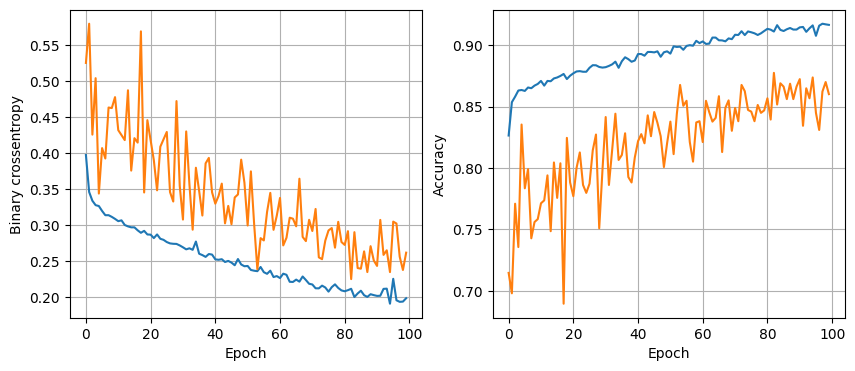

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8686 - loss: 0.4407
Validation loss: 0.43115073442459106
128 nodes, dropout 0, lr0.01, batch size 128


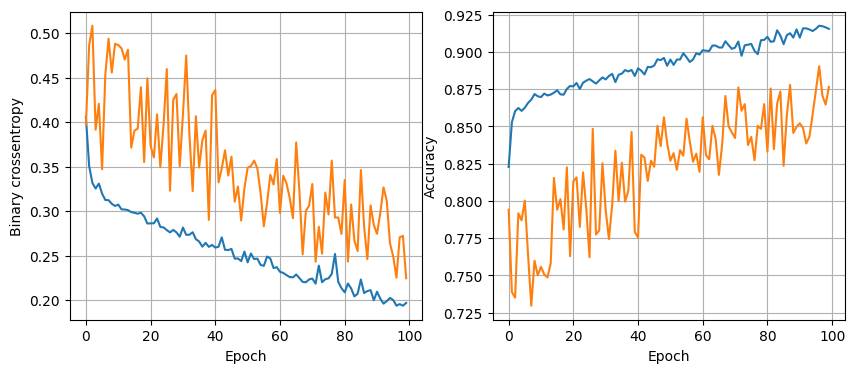

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8560 - loss: 0.4424
Validation loss: 0.4375764727592468
128 nodes, dropout 0, lr0.005, batch size 32


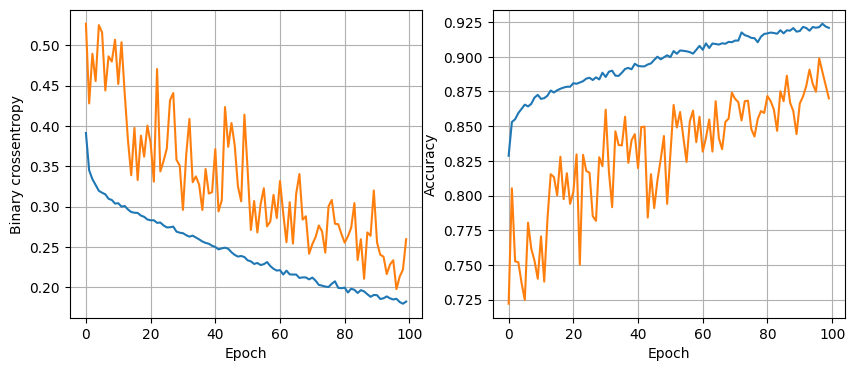

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8633 - loss: 0.4591
Validation loss: 0.45949608087539673
128 nodes, dropout 0, lr0.005, batch size 64


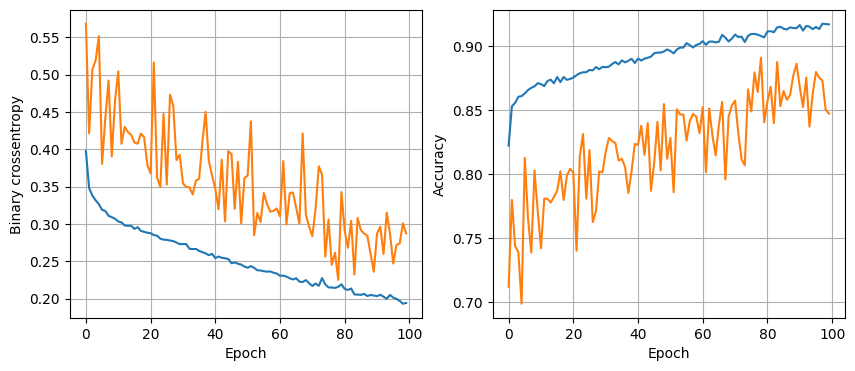

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.4142
Validation loss: 0.4059875011444092
128 nodes, dropout 0, lr0.005, batch size 128


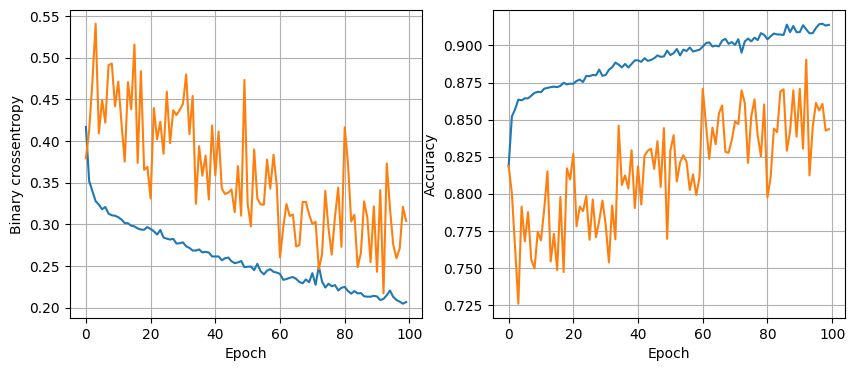

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8703 - loss: 0.3774
Validation loss: 0.3739141821861267
128 nodes, dropout 0, lr0.001, batch size 32


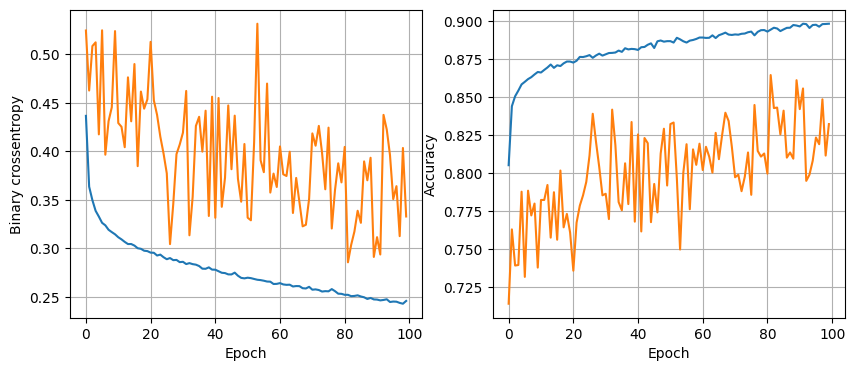

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8717 - loss: 0.3333
Validation loss: 0.33169811964035034
128 nodes, dropout 0, lr0.001, batch size 64


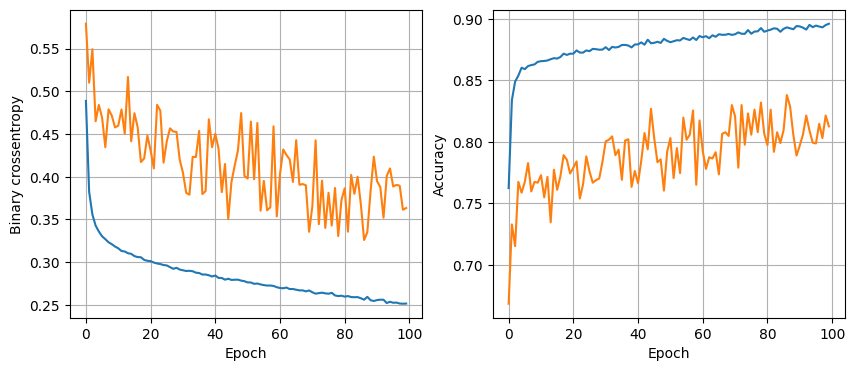

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.3215
Validation loss: 0.3145364820957184
128 nodes, dropout 0, lr0.001, batch size 128


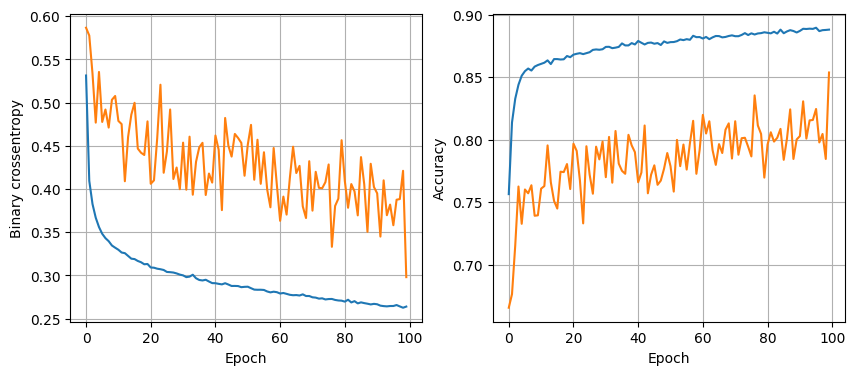

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8587 - loss: 0.3235
Validation loss: 0.3218102753162384
128 nodes, dropout 0.2, lr0.01, batch size 32


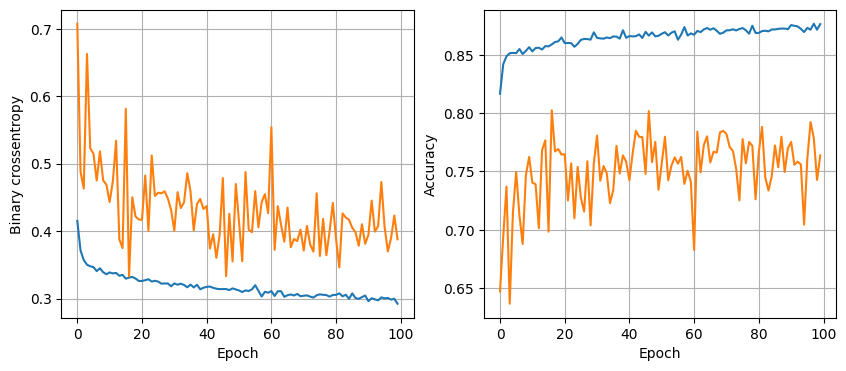

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.3207
Validation loss: 0.3167334198951721
128 nodes, dropout 0.2, lr0.01, batch size 64


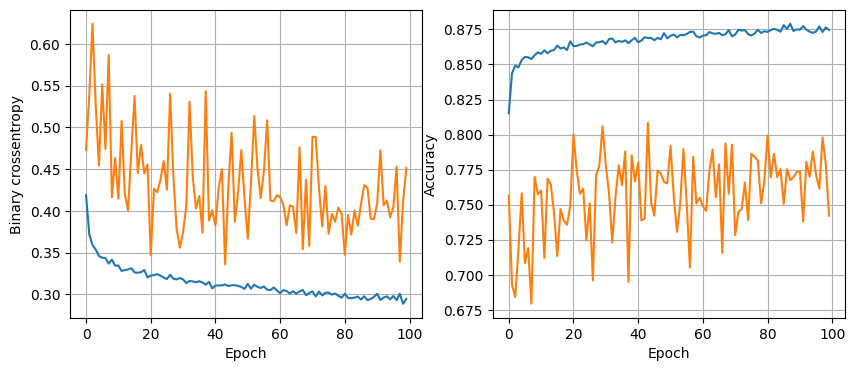

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8701 - loss: 0.3281
Validation loss: 0.3137108385562897
128 nodes, dropout 0.2, lr0.01, batch size 128


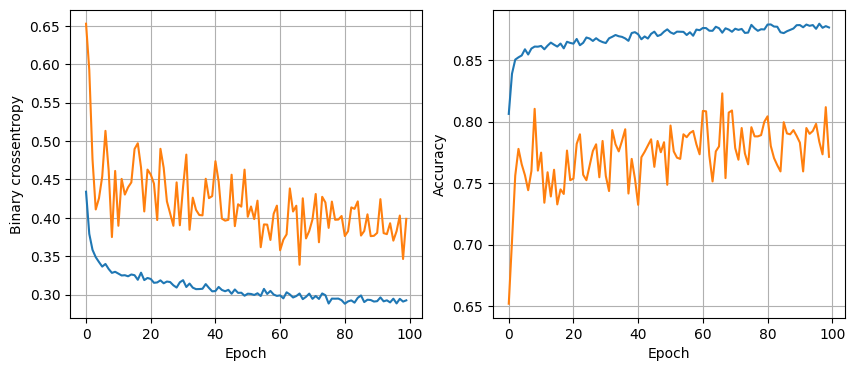

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8724 - loss: 0.3111
Validation loss: 0.30852600932121277
128 nodes, dropout 0.2, lr0.005, batch size 32


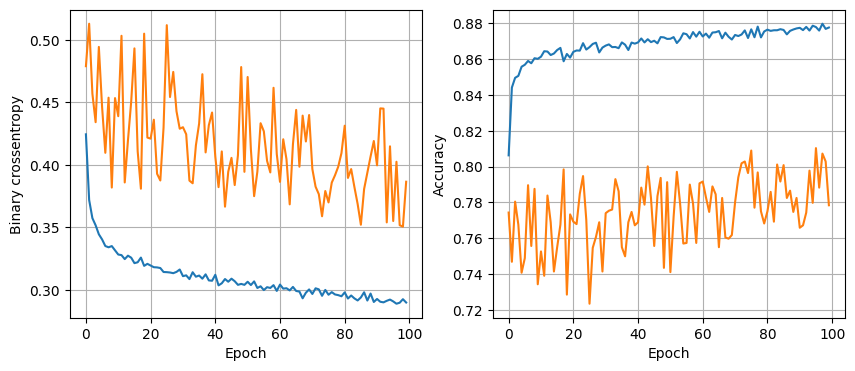

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8766 - loss: 0.3087
Validation loss: 0.3037320673465729
128 nodes, dropout 0.2, lr0.005, batch size 64


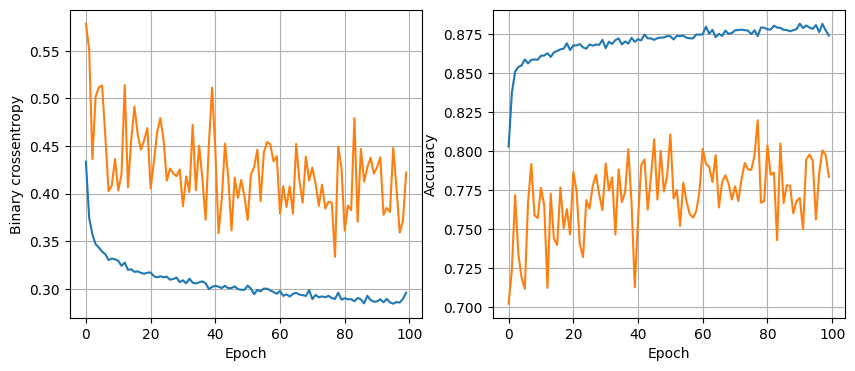

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.3141
Validation loss: 0.3039202392101288
128 nodes, dropout 0.2, lr0.005, batch size 128


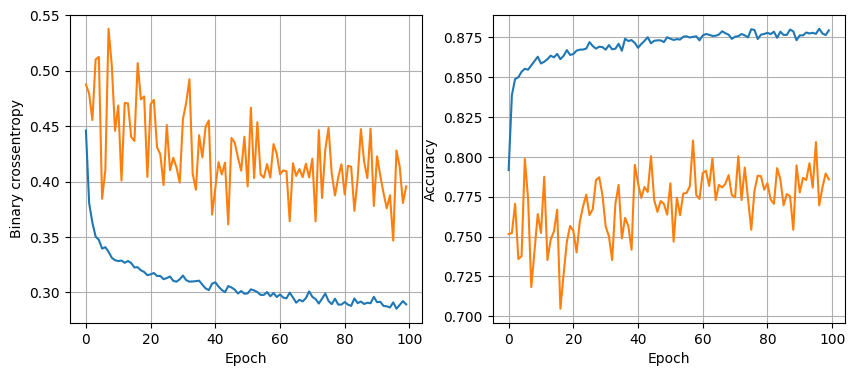

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.3044
Validation loss: 0.30003687739372253
128 nodes, dropout 0.2, lr0.001, batch size 32


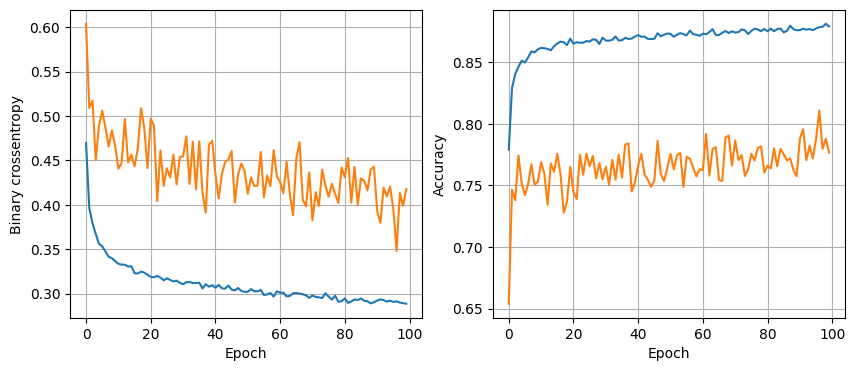

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.3043
Validation loss: 0.30058160424232483
128 nodes, dropout 0.2, lr0.001, batch size 64


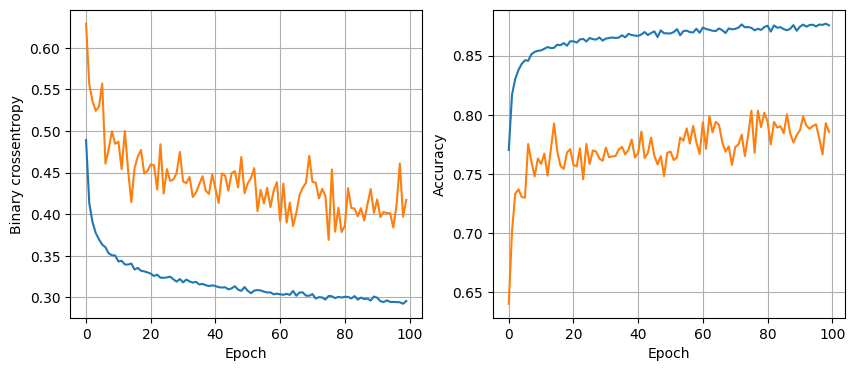

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8774 - loss: 0.3051
Validation loss: 0.30070218443870544
128 nodes, dropout 0.2, lr0.001, batch size 128


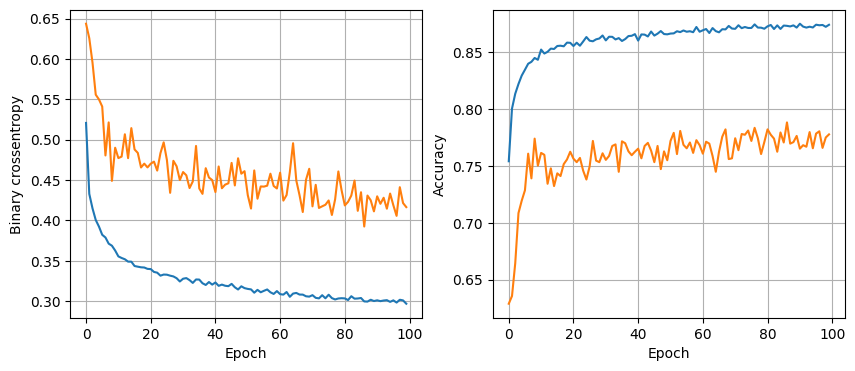

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8738 - loss: 0.3038
Validation loss: 0.3007086515426636
256 nodes, dropout 0, lr0.01, batch size 32


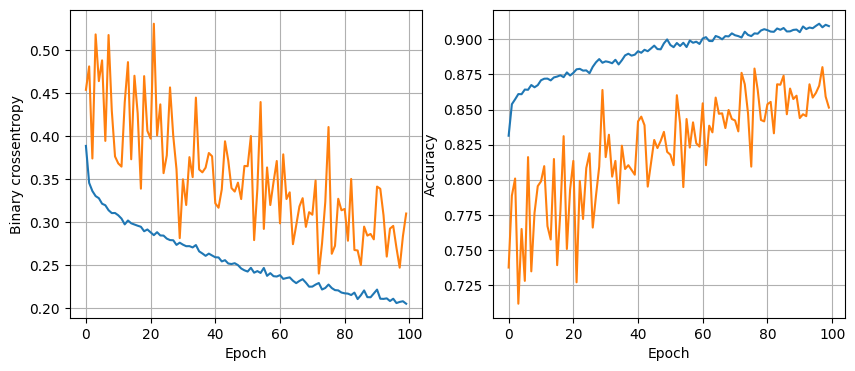

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8699 - loss: 0.4601
Validation loss: 0.44904932379722595
256 nodes, dropout 0, lr0.01, batch size 64


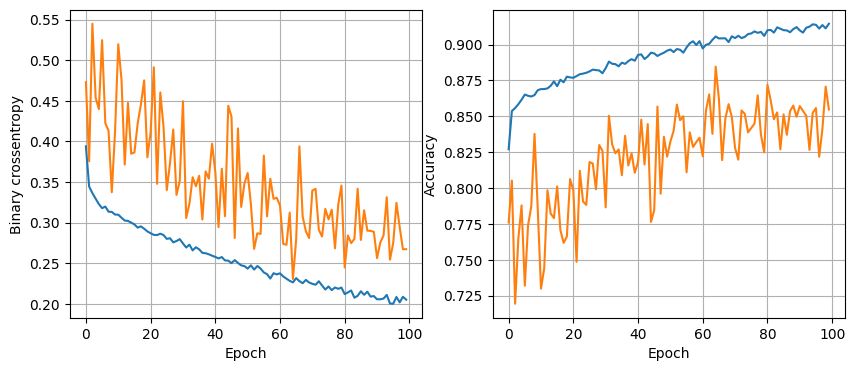

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8534 - loss: 0.4256
Validation loss: 0.4235881567001343
256 nodes, dropout 0, lr0.01, batch size 128


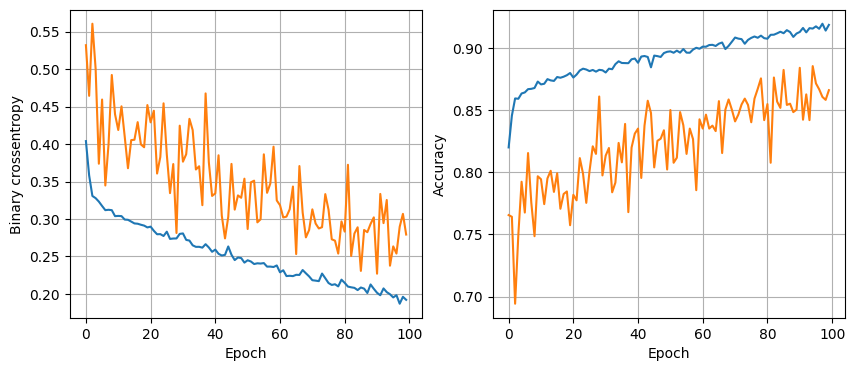

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8635 - loss: 0.4224
Validation loss: 0.43977004289627075
256 nodes, dropout 0, lr0.005, batch size 32


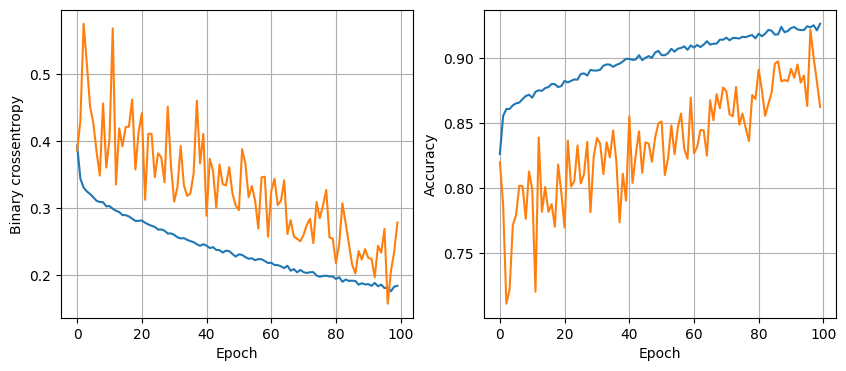

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8637 - loss: 0.4805
Validation loss: 0.4768051505088806
256 nodes, dropout 0, lr0.005, batch size 64


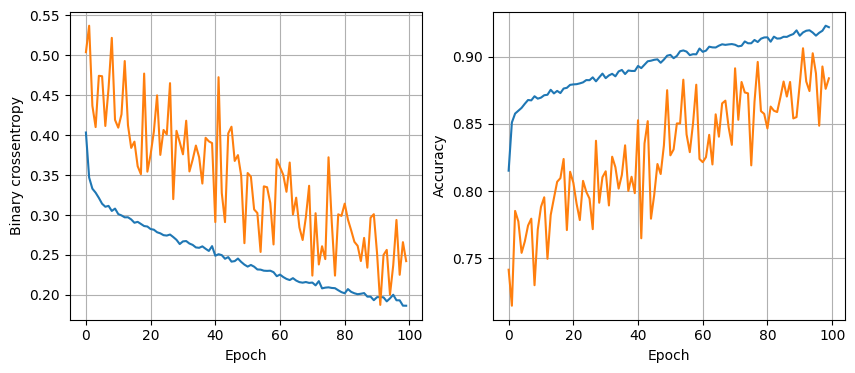

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8548 - loss: 0.4558
Validation loss: 0.4433183968067169
256 nodes, dropout 0, lr0.005, batch size 128


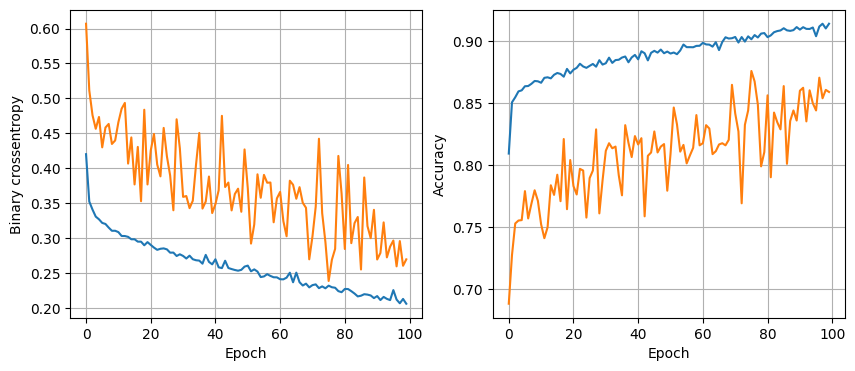

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8614 - loss: 0.3829
Validation loss: 0.37571224570274353
256 nodes, dropout 0, lr0.001, batch size 32


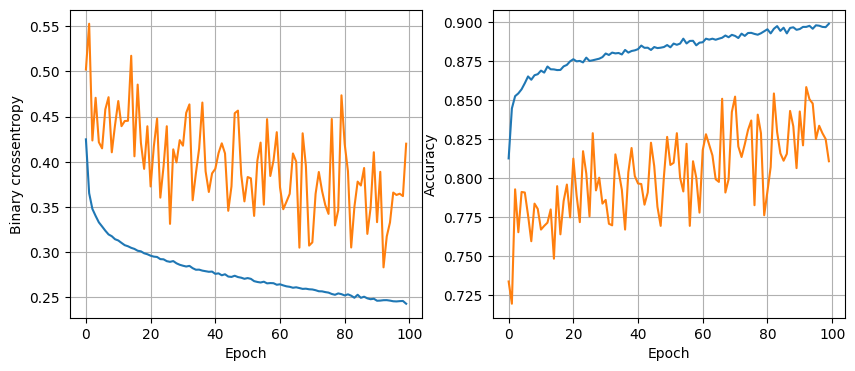

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3325
Validation loss: 0.32980626821517944
256 nodes, dropout 0, lr0.001, batch size 64


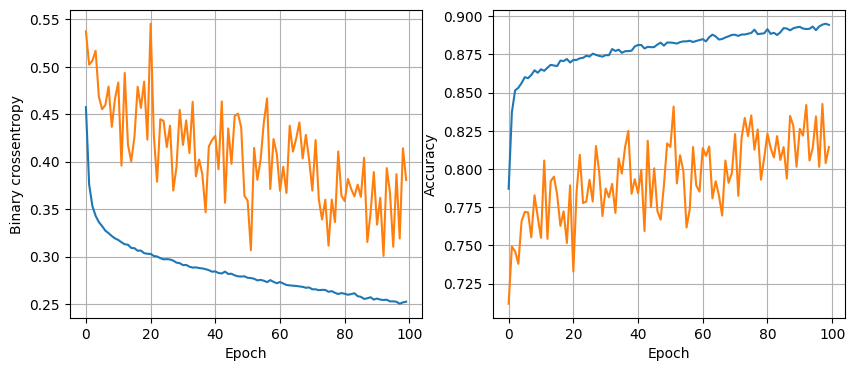

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3171
Validation loss: 0.31599971652030945
256 nodes, dropout 0, lr0.001, batch size 128


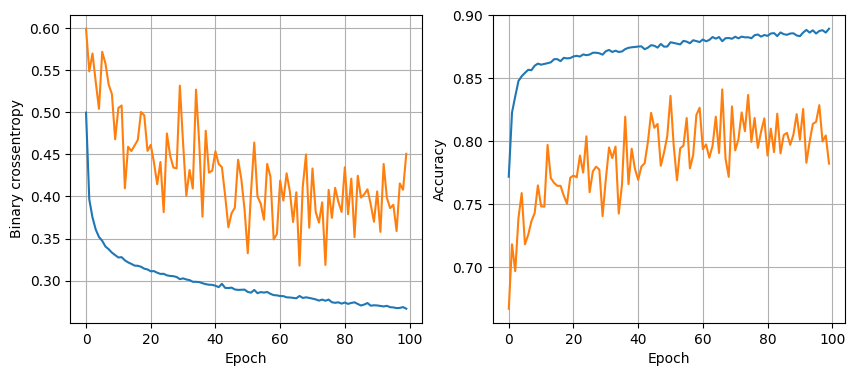

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8694 - loss: 0.3166
Validation loss: 0.31202200055122375
256 nodes, dropout 0.2, lr0.01, batch size 32


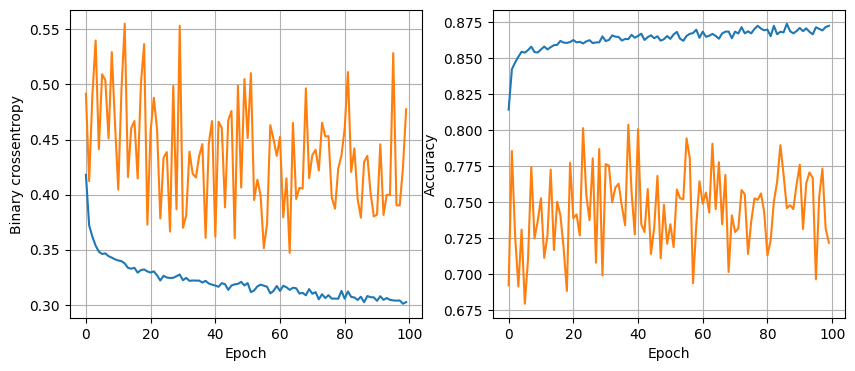

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8661 - loss: 0.3346
Validation loss: 0.32536581158638
256 nodes, dropout 0.2, lr0.01, batch size 64


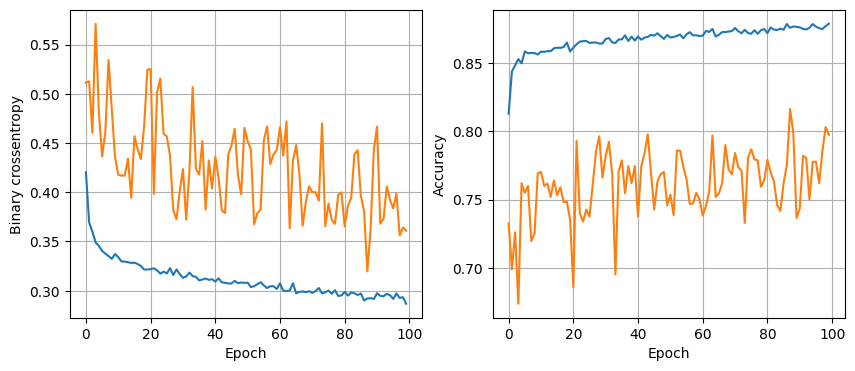

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3202
Validation loss: 0.31108415126800537
256 nodes, dropout 0.2, lr0.01, batch size 128


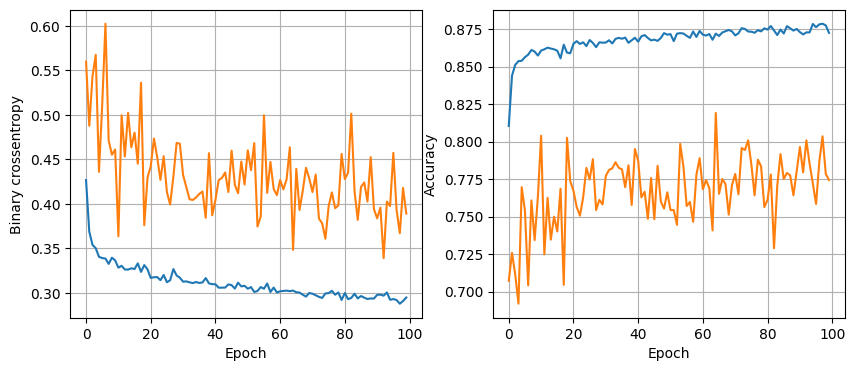

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8729 - loss: 0.3131
Validation loss: 0.30840620398521423
256 nodes, dropout 0.2, lr0.005, batch size 32


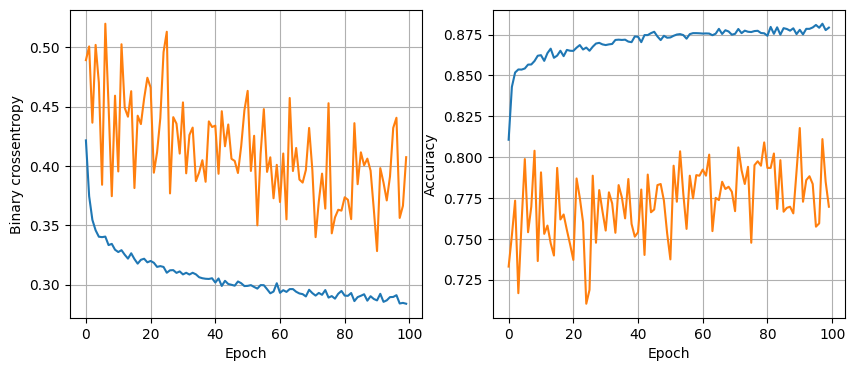

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.3105
Validation loss: 0.3020586669445038
256 nodes, dropout 0.2, lr0.005, batch size 64


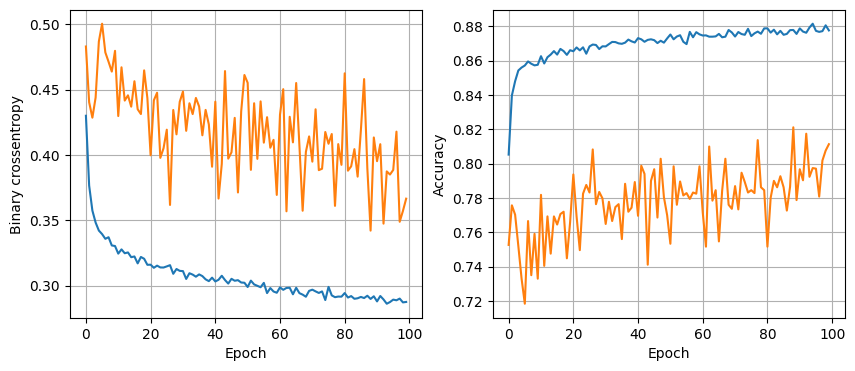

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8761 - loss: 0.3109
Validation loss: 0.3051697909832001
256 nodes, dropout 0.2, lr0.005, batch size 128


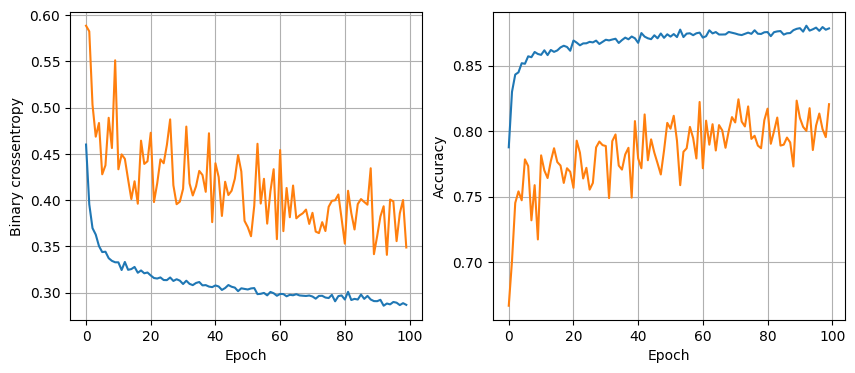

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.3137
Validation loss: 0.30755582451820374
256 nodes, dropout 0.2, lr0.001, batch size 32


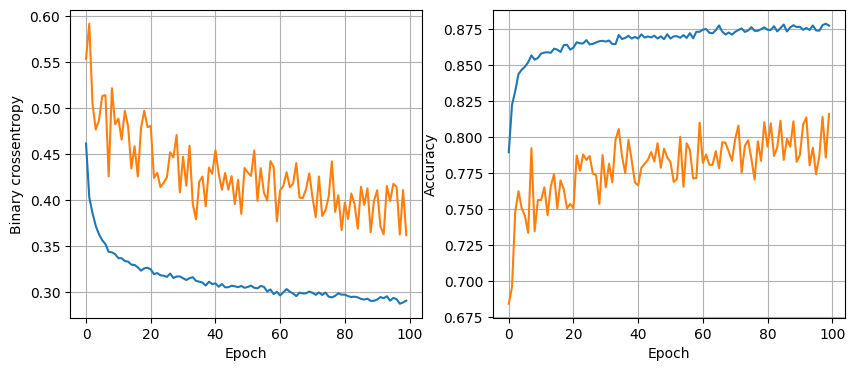

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3114
Validation loss: 0.30743661522865295
256 nodes, dropout 0.2, lr0.001, batch size 64


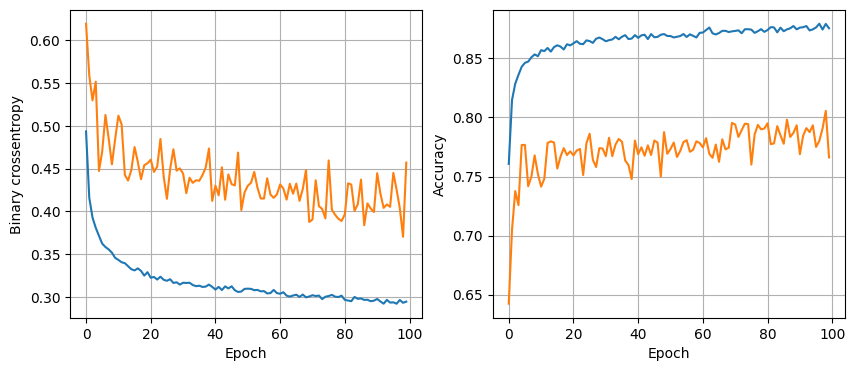

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8752 - loss: 0.3067
Validation loss: 0.3007454574108124
256 nodes, dropout 0.2, lr0.001, batch size 128


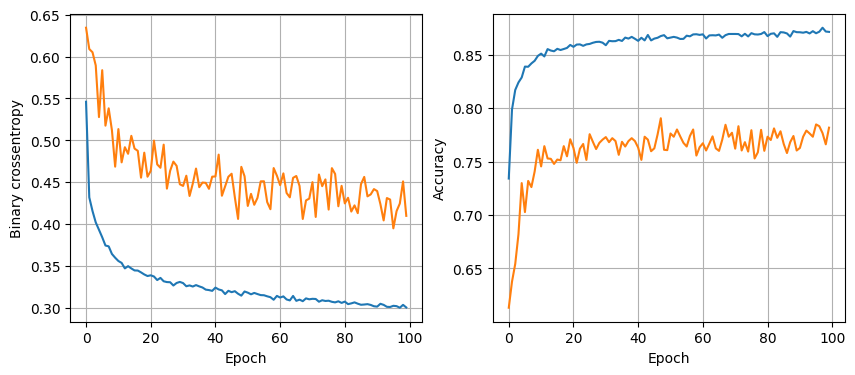

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8713 - loss: 0.3088
Validation loss: 0.3048965334892273


In [ ]:
least_val_loss = float('inf')
leasst_loss_model = None
epochs= 100
for num_nodes in [16, 32, 64, 128, 256]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr{lr}, batch size {batch_size}")
        model, history = train_model(x_train, ytrain, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, yvalid)[0]
        print(f"Validation loss: {val_loss}")
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

